<p style="font-size:36px; font-family:verdana; line-height: 1.7em">House Price Prediction</p>

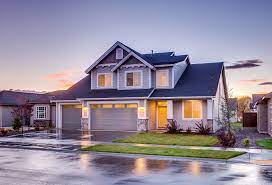

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Import The Necessary Libraries:</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Load the train and test data

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
print("Shape of train data is",train_df.shape,"Shape of test data is",test_df.shape)

Shape of train data is (1460, 81) Shape of test data is (1459, 80)


# basic information about dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- unique data counts in each columns

In [8]:
a=pd.DataFrame(train_df.nunique(),columns=["count"])
a
a.sort_values(by="count",ascending=False)


,count
Id,1460
LotArea,1073
GrLivArea,861
BsmtUnfSF,780
1stFlrSF,753
...,...
HalfBath,3
Street,2
CentralAir,2
Utilities,2


In [9]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Handling missing values

- check for null values

In [10]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
def nullValues(df):
    total=df.isnull().sum()
    percent=df.isnull().sum()/df.isnull().count()*100
    null_df=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    null_df=null_df[null_df["Percent"]>0]
    null_df=null_df.sort_values(by="Percent",ascending=False)
    print(pd.DataFrame(null_df))
    plt.figure(figsize=(16,10))
    sns.barplot(x=null_df.index,y=null_df["Percent"],color="g")
    plt.xticks(rotation=90)
    plt.xlabel("Null_value_Column")
    plt.ylabel("Percent")

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493


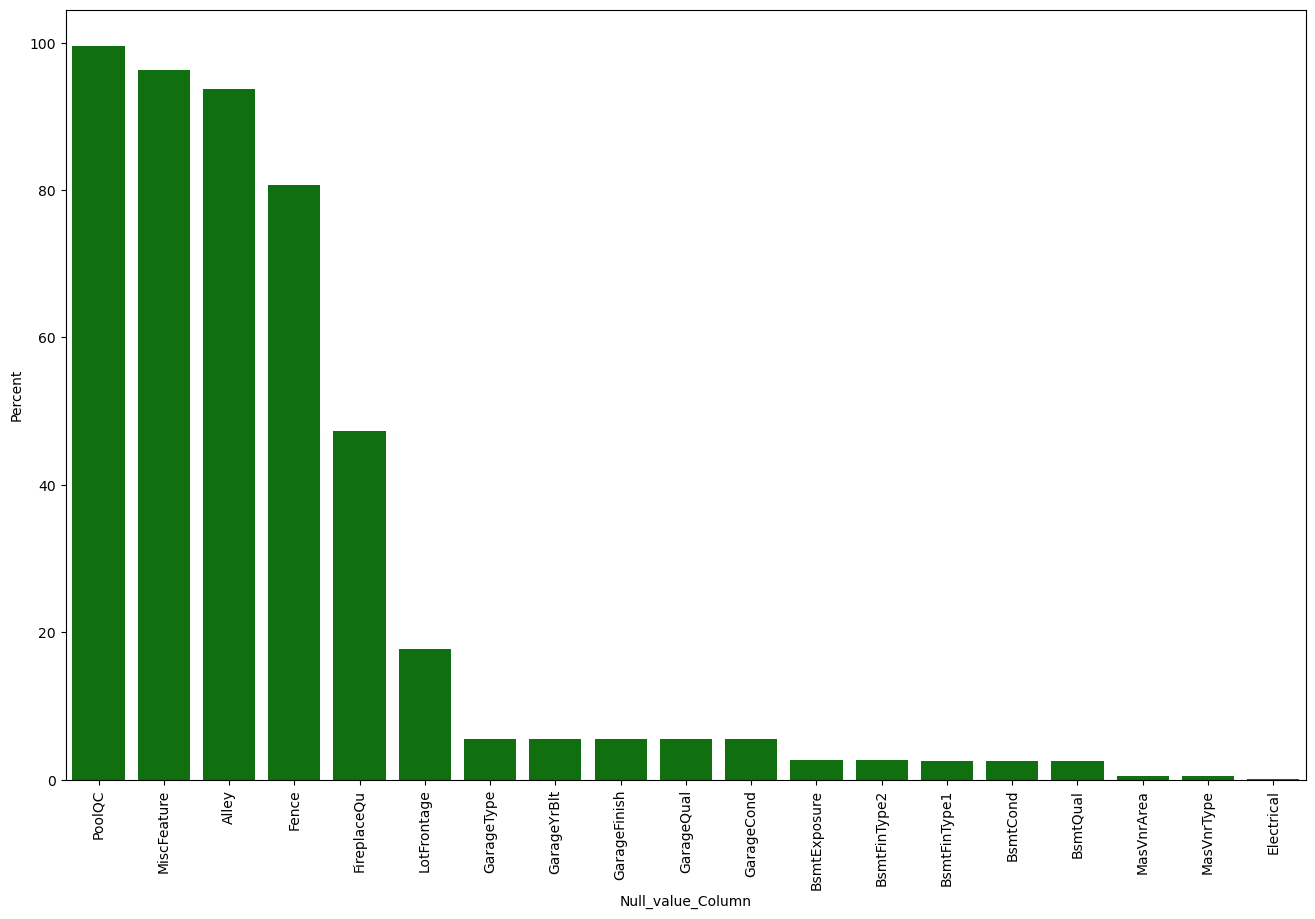

In [12]:
nullValues(train_df)

<AxesSubplot:>

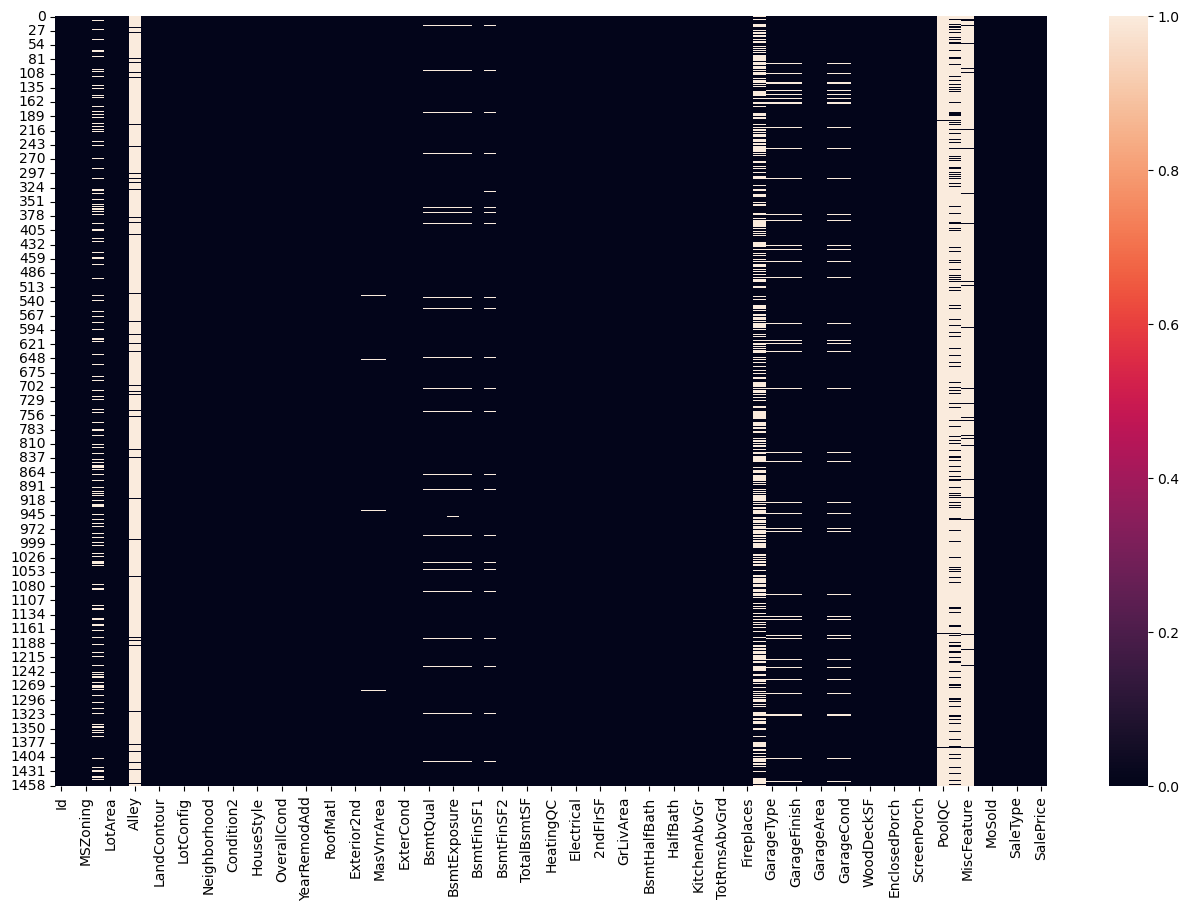

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.isna())

              Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageCond       78   5.346127
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFinish     78   5.346127
GarageType       76   5.209047
BsmtCond         45   3.084304
BsmtExposure     44   3.015764
BsmtQual         44   3.015764
BsmtFinType1     42   2.878684
BsmtFinType2     42   2.878684
MasVnrType       16   1.096642
MasVnrArea       15   1.028101
MSZoning          4   0.274160
BsmtFullBath      2   0.137080
BsmtHalfBath      2   0.137080
Functional        2   0.137080
Utilities         2   0.137080
GarageCars        1   0.068540
GarageArea        1   0.068540
TotalBsmtSF       1   0.068540
KitchenQual       1   0.068540
BsmtUnfSF         1   0.068540
BsmtFinSF2        1   0.068540
BsmtFinSF1        1   0.068540
Exterior2nd       1   0.068540
Exterior

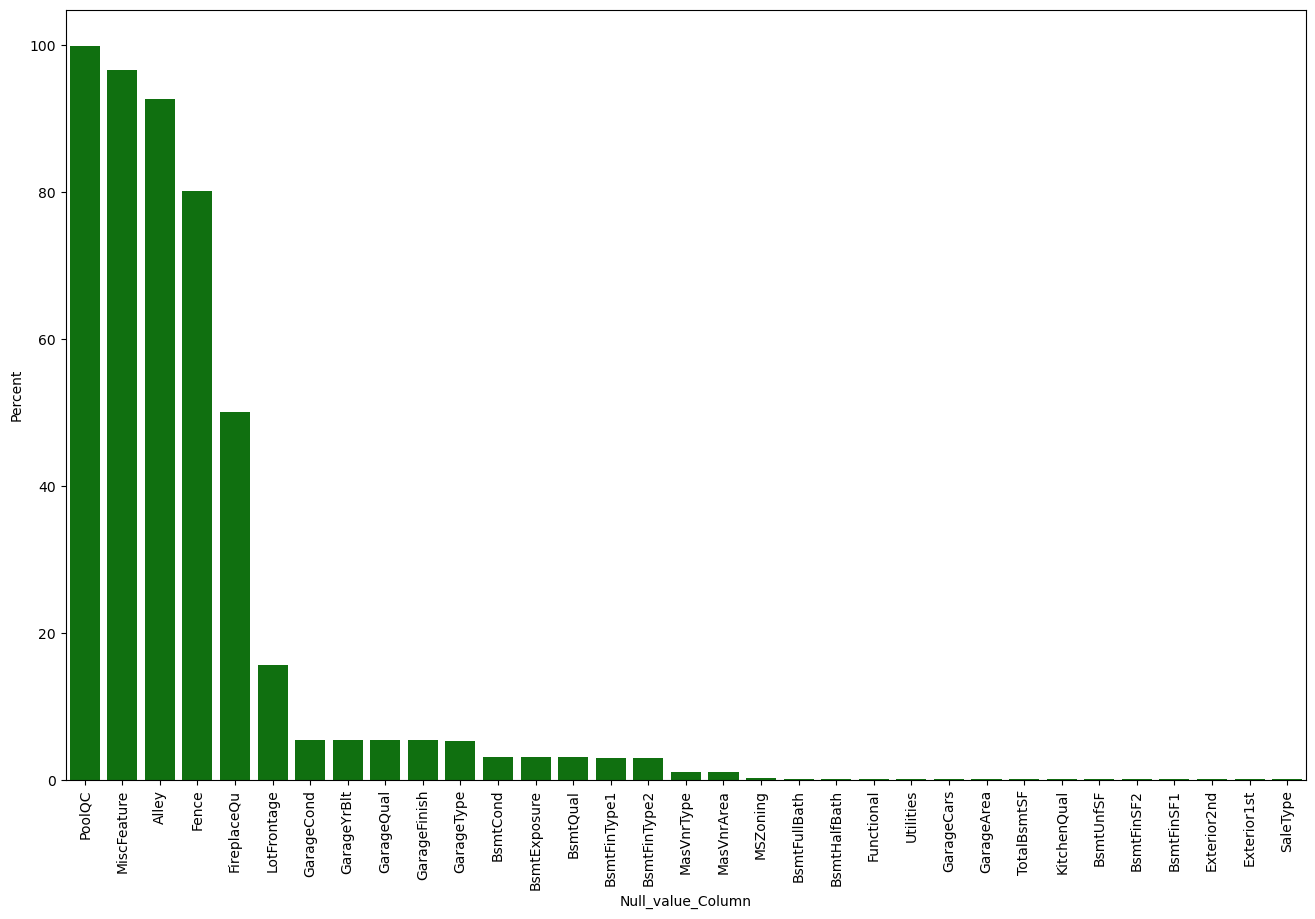

In [14]:
nullValues(test_df)

<AxesSubplot:>

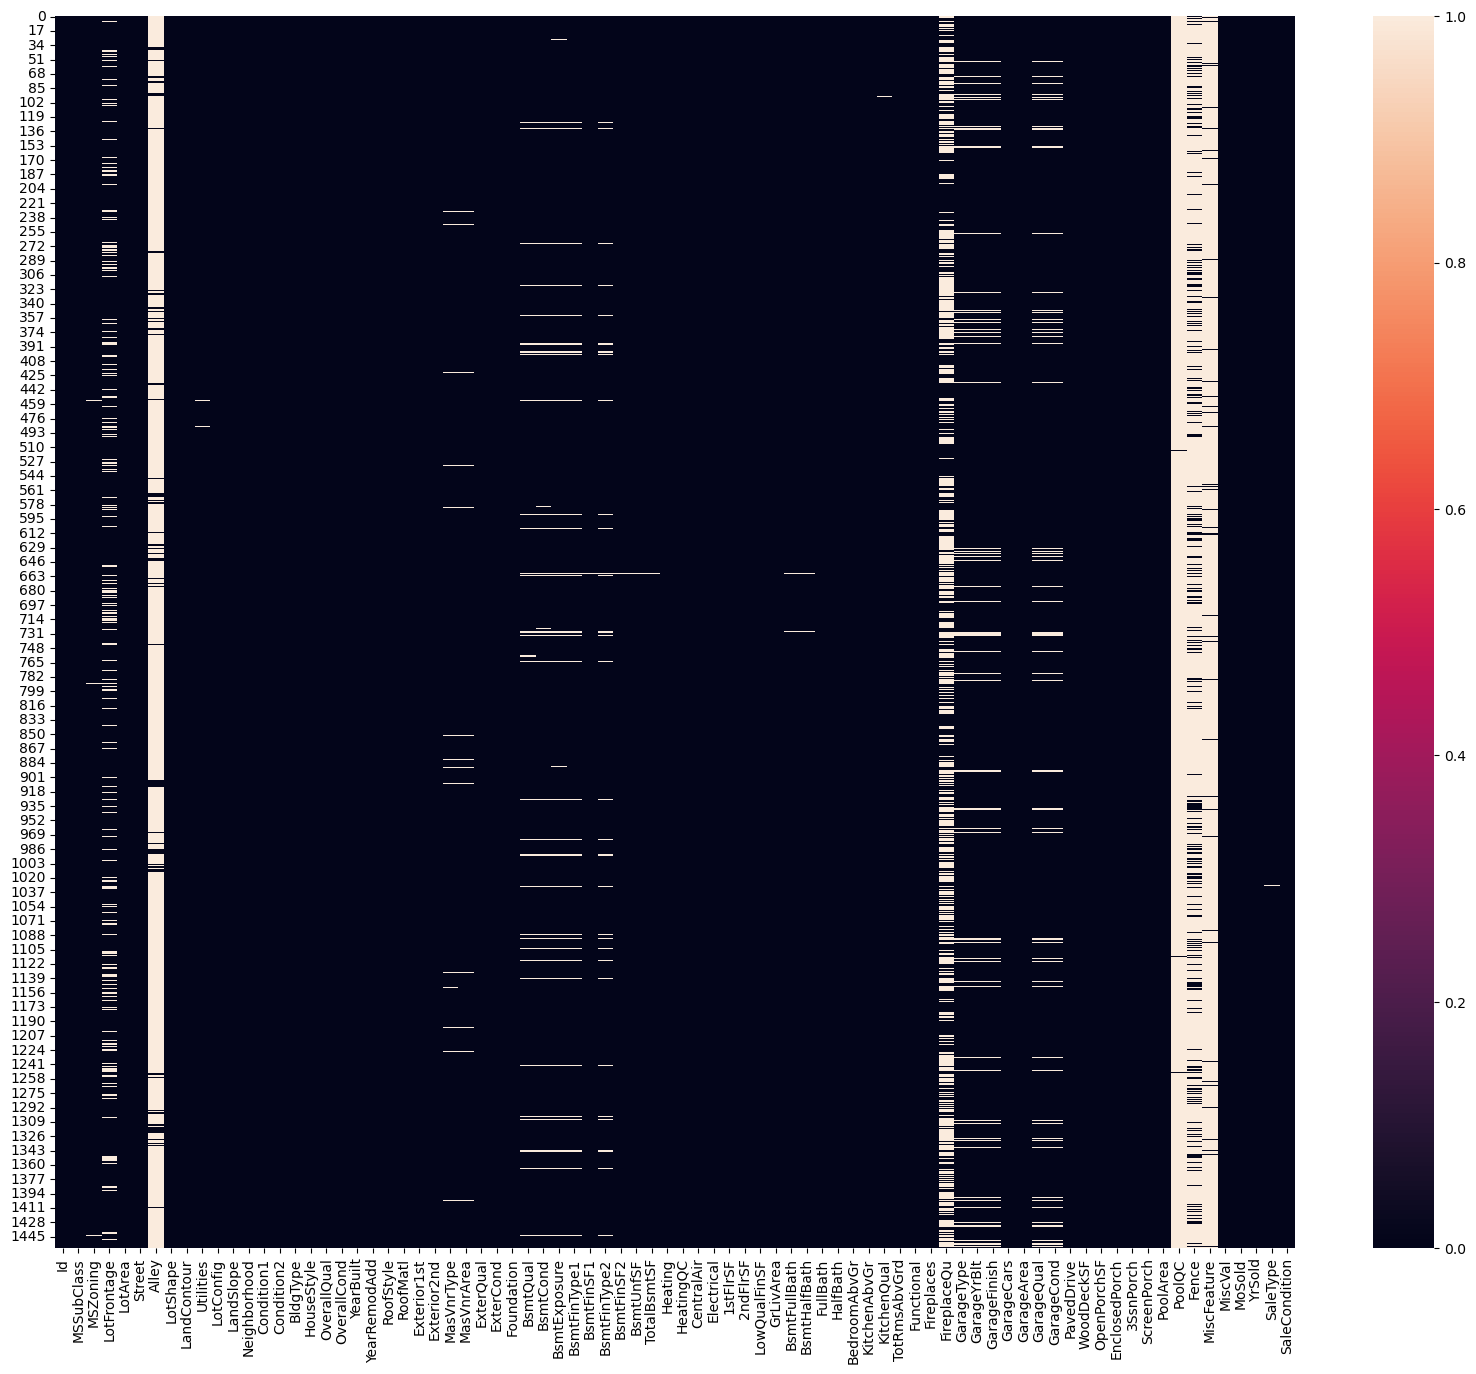

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(test_df.isna())

In [16]:
train_df=train_df.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)
test_df=test_df.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)

Id-> It does not helps in prediction.

PoolQC-> 99.8% data is NaN.

MiscFeature-> 96% data is NaN.

Alley-> 93% data is NaN.

Fence-> 80% data is NaN.

FireplaceQu-> 50% data is NaN.

In [17]:
columns = train_df.columns
print(columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [18]:
train_df.corr().sort_values(by="SalePrice",ascending=False)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


listing date columns

In [19]:
year_columns=[column for column in columns if "Year" in column or "Yr" in column ]
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

listing categorical data columns

In [20]:
categorical_cols=[column for column in columns if (train_df[column].nunique()<27) & (column not in year_columns)]
categorical_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

List of continous data columns

In [21]:
continous_cols=[column for column in columns if column not in categorical_cols and column not in year_columns]
del(continous_cols[-1])
continous_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

Handling null values in Categorical columns

In [22]:
def handle_cat_null(cols):
    for column in cols:
        train_df[column].fillna(train_df[column].mode()[0],inplace=True)
        test_df[column].fillna(train_df[column].mode()[0],inplace=True)

In [23]:
handle_cat_null(categorical_cols)
train_df[categorical_cols].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
3SsnPorch        0
PoolArea         0
MiscVal          0
MoSold      

In [24]:
test_df[categorical_cols].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
3SsnPorch        0
PoolArea         0
MiscVal          0
MoSold      

In [25]:
def handle_cont_cols(cols):
    for column in cols:
        train_df[column].fillna(train_df[column].mean(),inplace=True)
        test_df[column].fillna(train_df[column].mean(),inplace=True)

In [26]:
handle_cont_cols(continous_cols)
train_df[continous_cols].isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

In [27]:
test_df[continous_cols].isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

In [28]:
train_df[year_columns].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

In [29]:
test_df[year_columns].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     78
YrSold           0
dtype: int64

In [30]:
train_df.drop(columns="GarageYrBlt",axis=1,inplace=True)
test_df.drop(columns="GarageYrBlt",axis=1,inplace=True)

we are dropping Garageyrblt because it has duplicate value of Yearbuilt, so high correlation between two columns.

In [31]:
year_columns.remove("GarageYrBlt")
year_columns

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [32]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [33]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

Data Visualisation

bar chart for categorical data

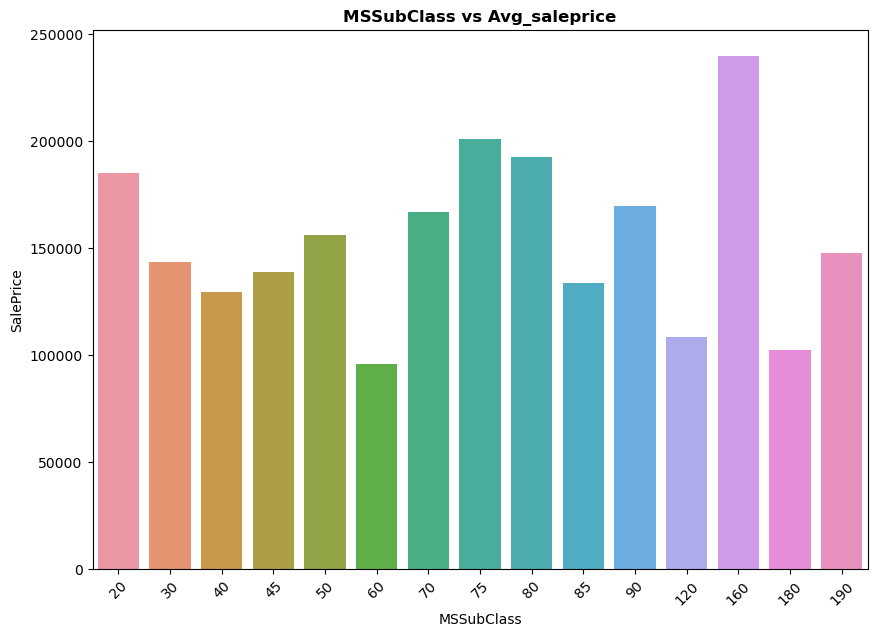

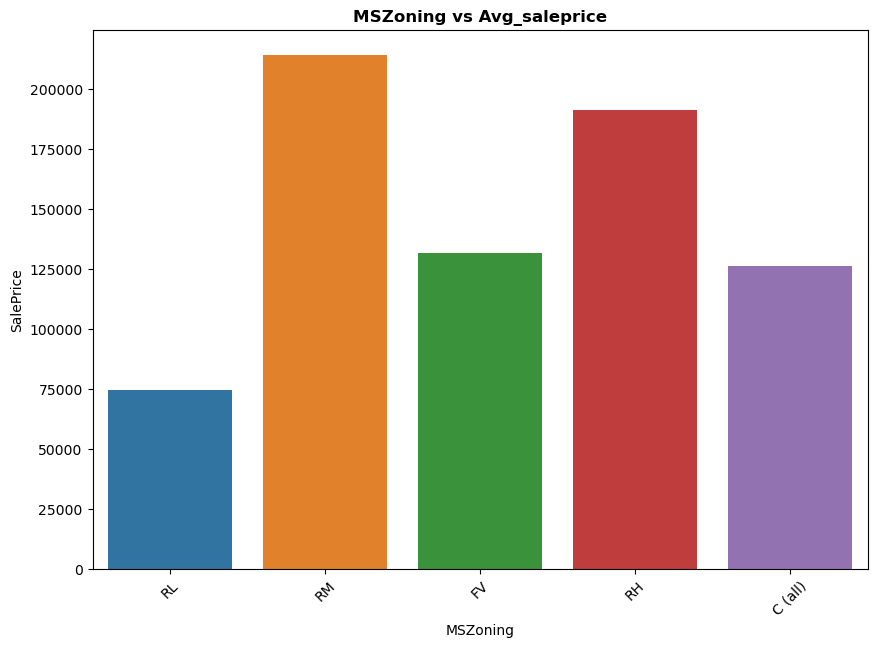

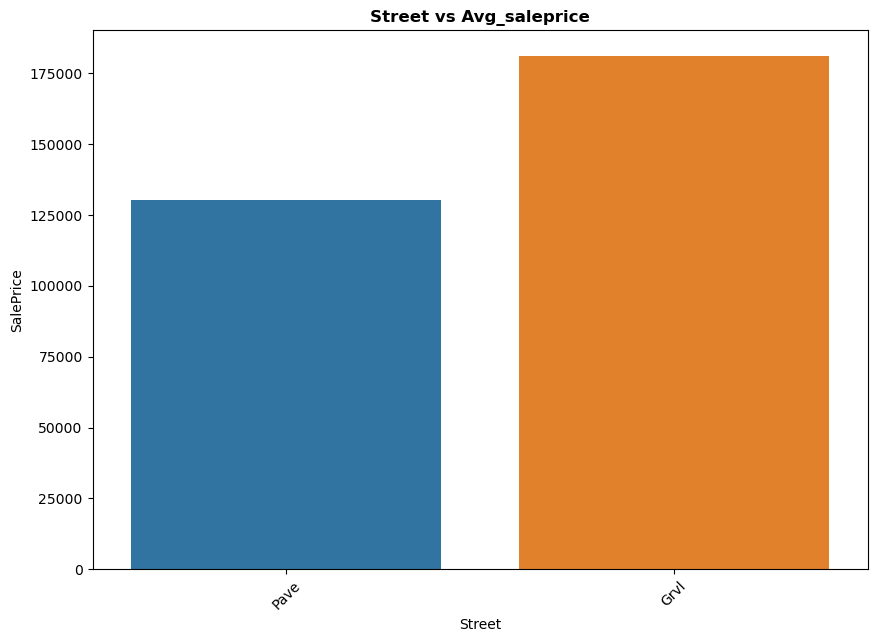

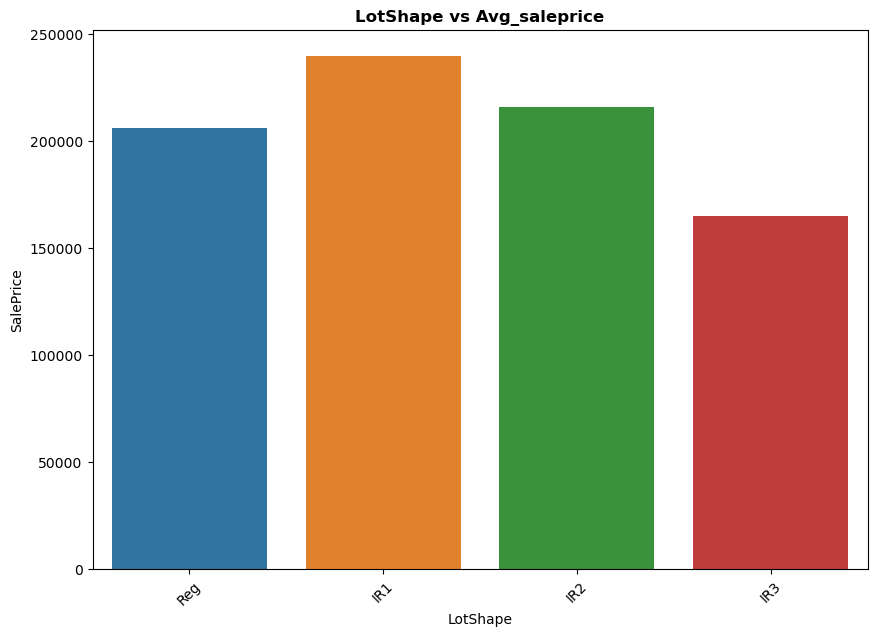

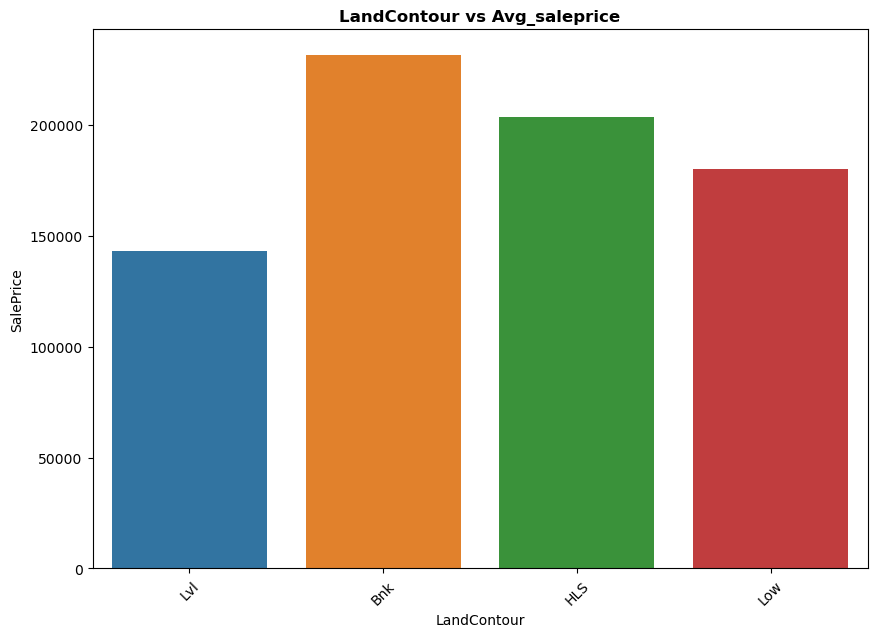

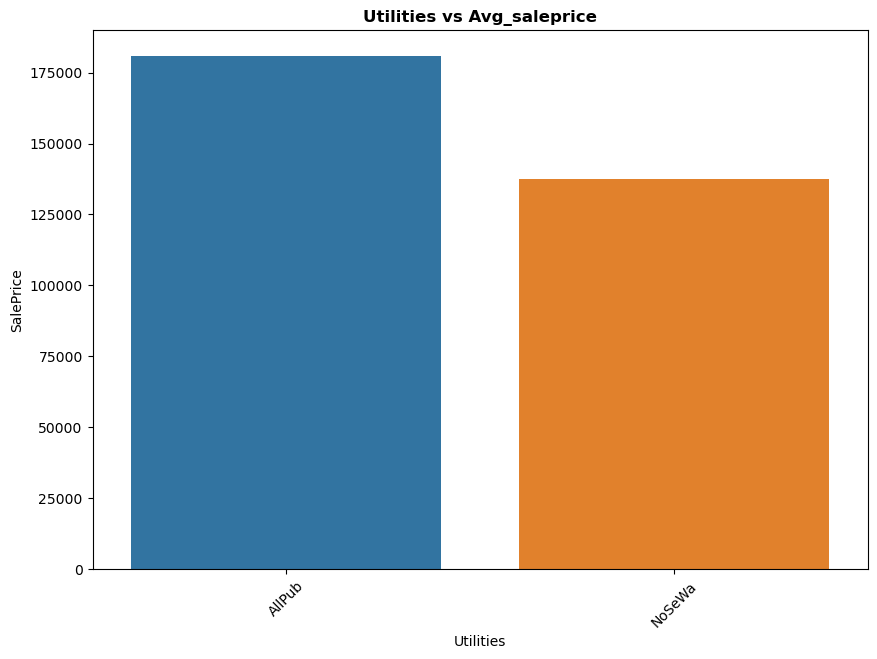

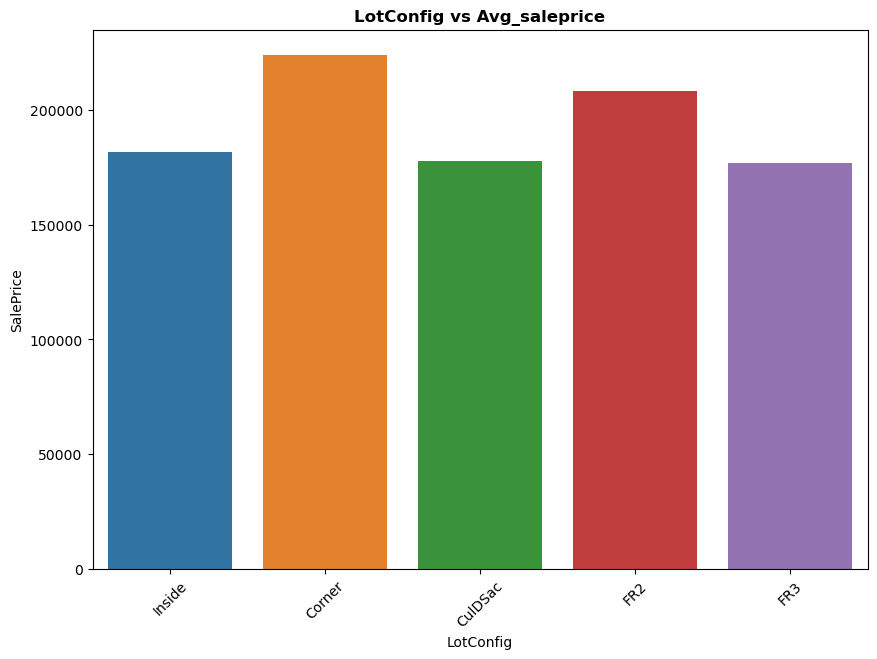

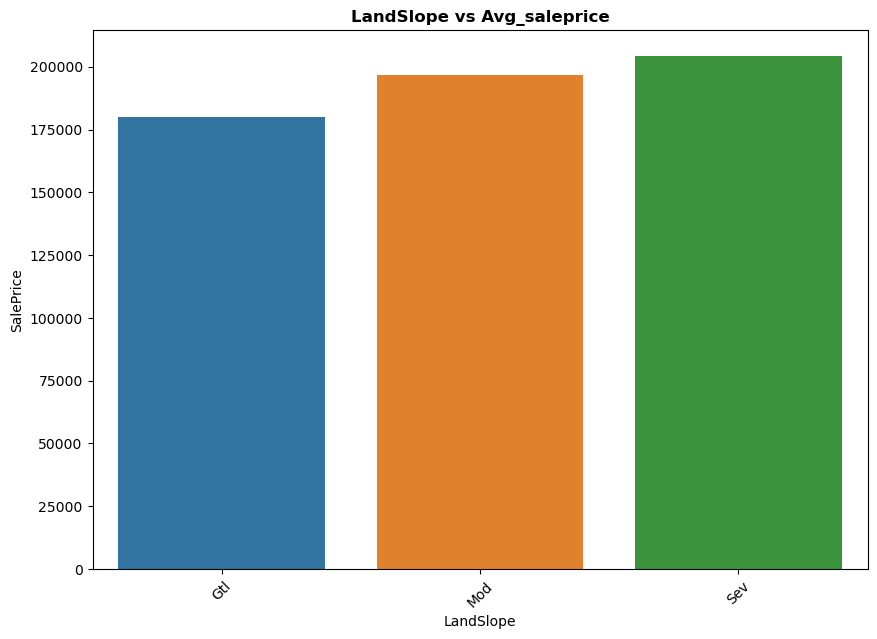

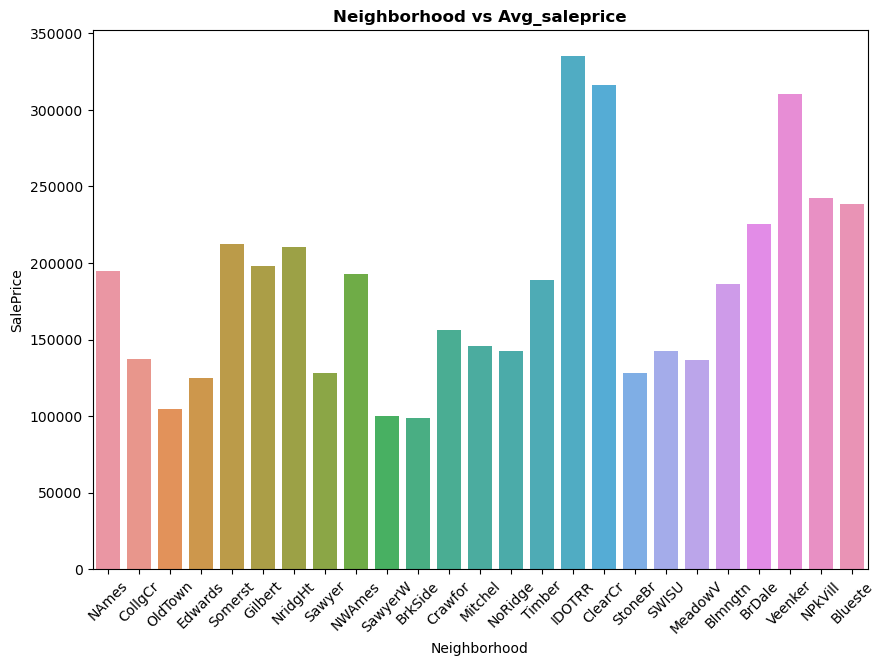

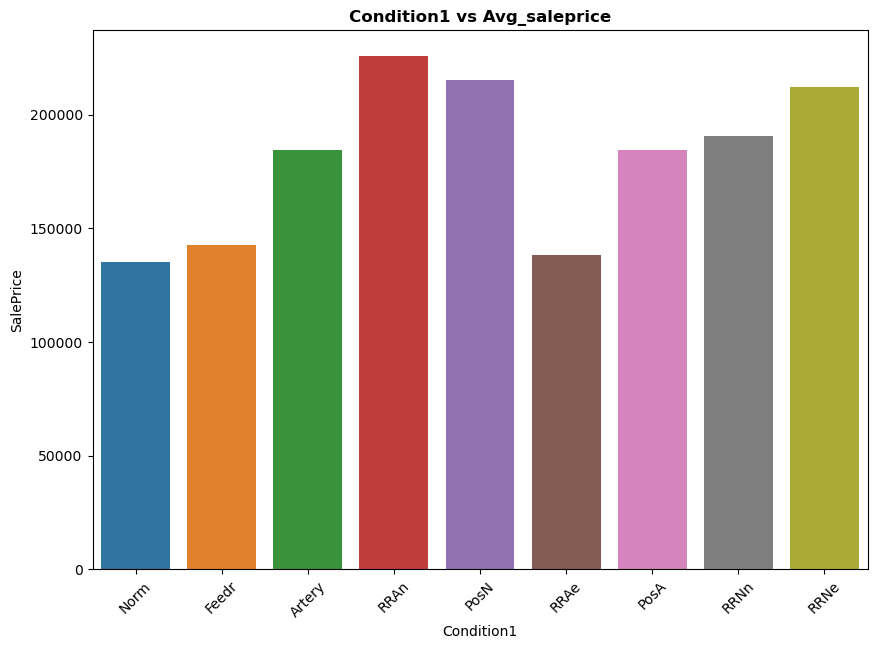

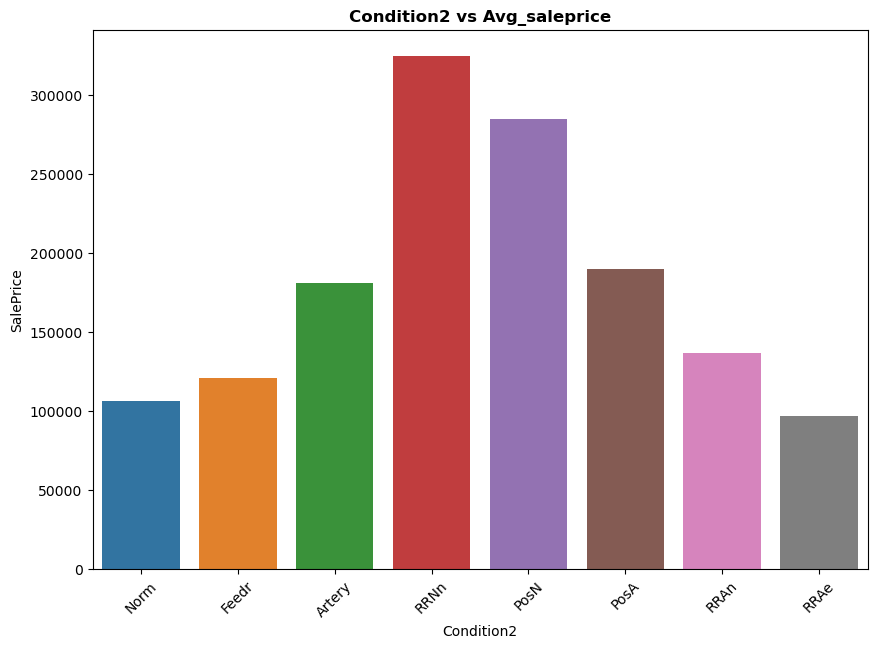

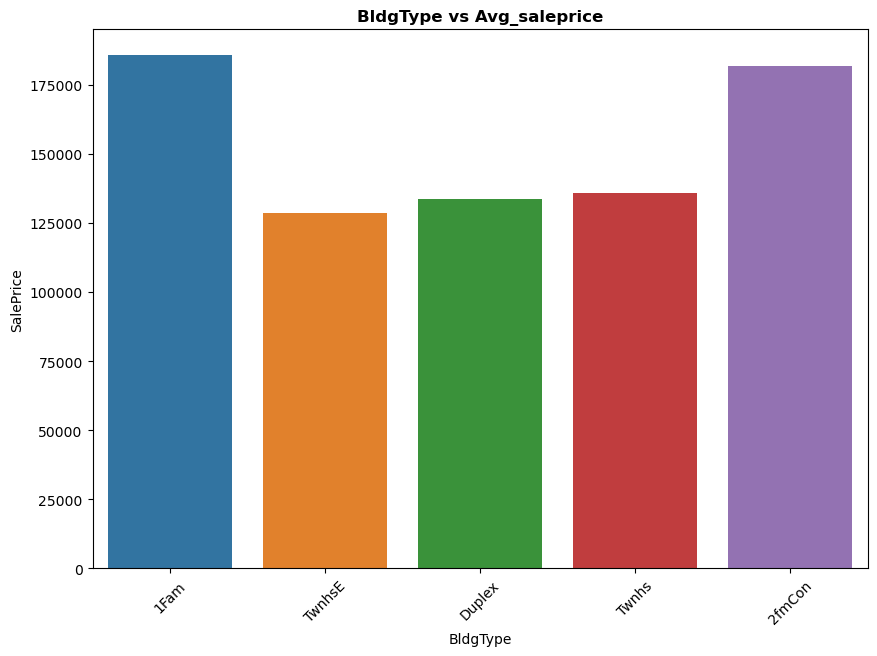

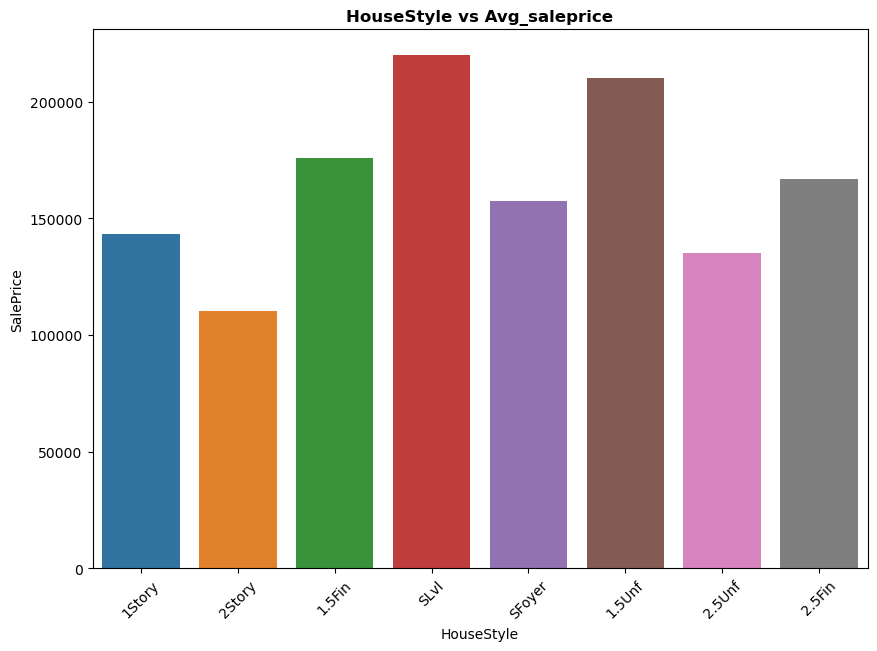

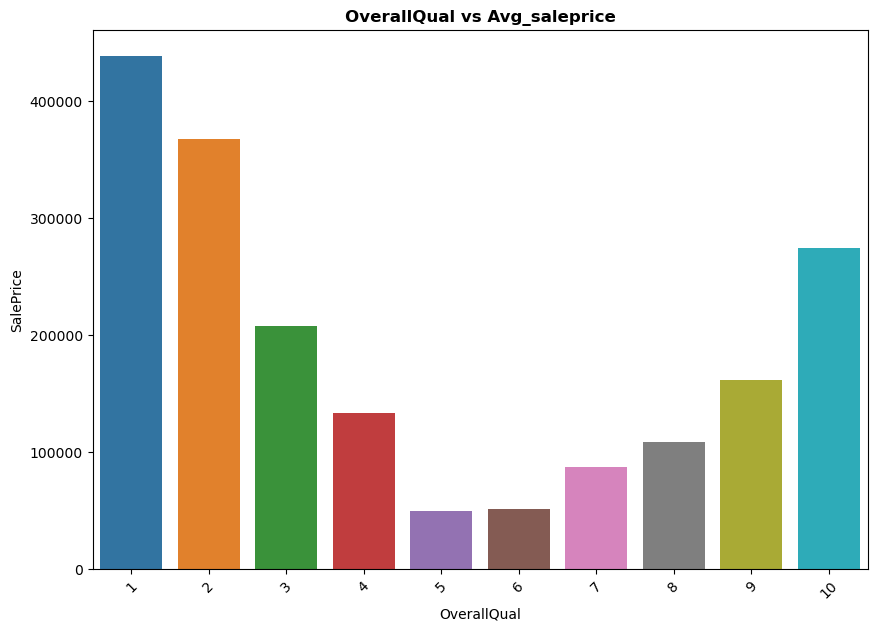

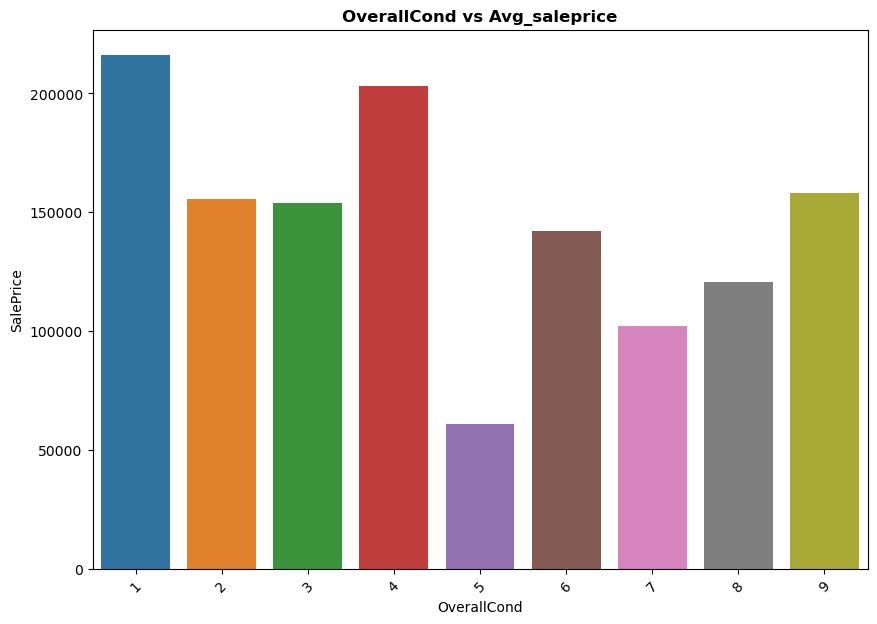

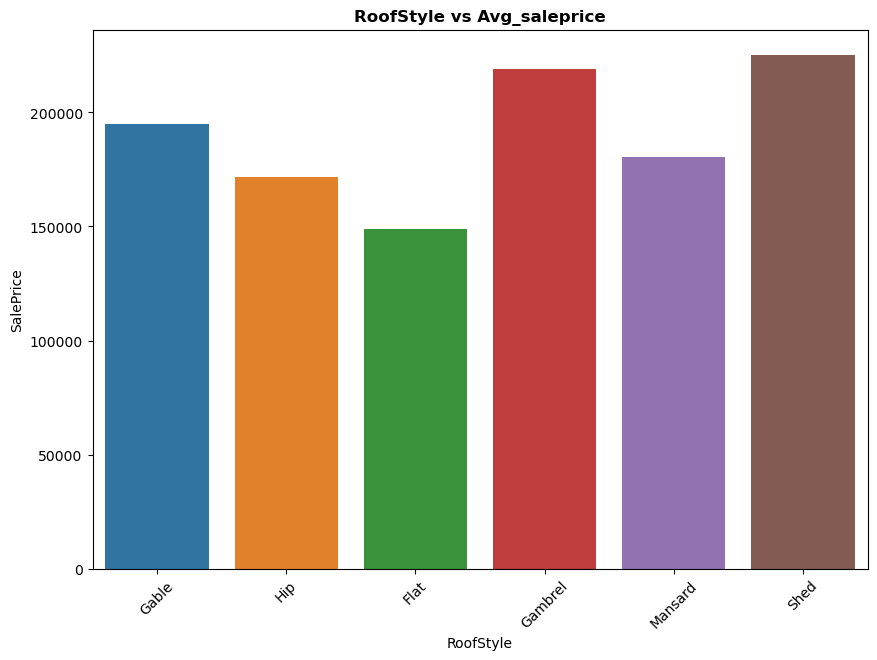

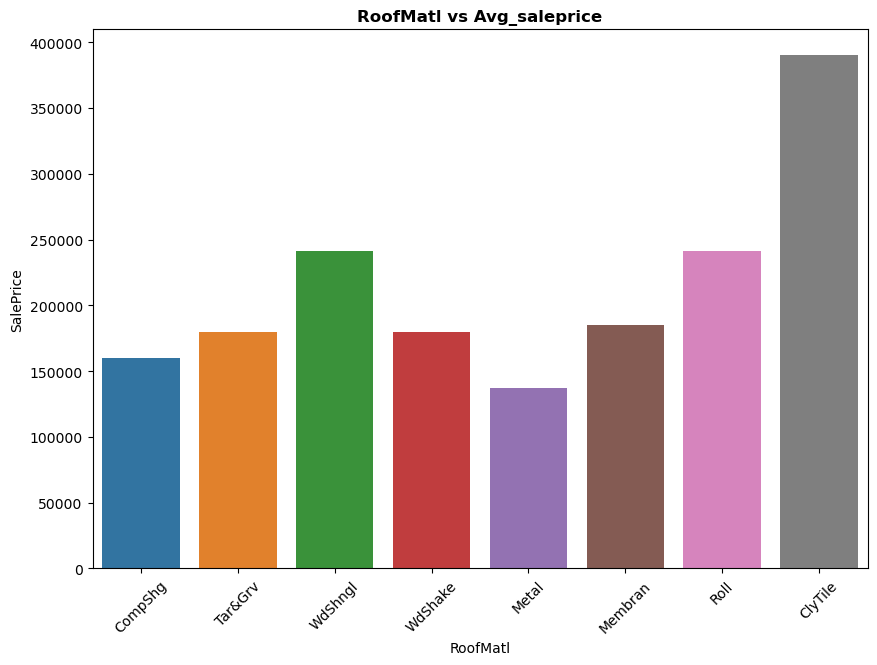

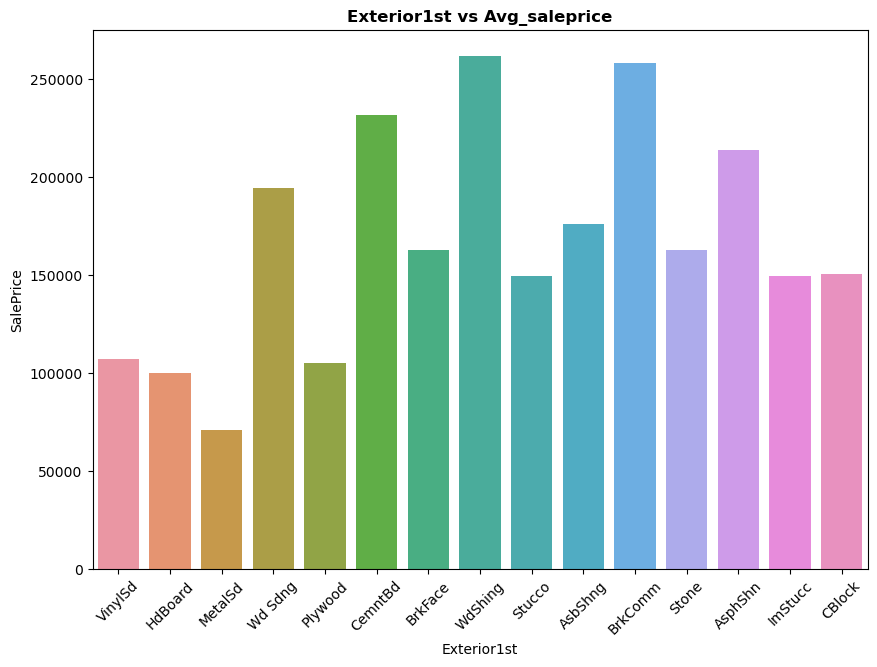

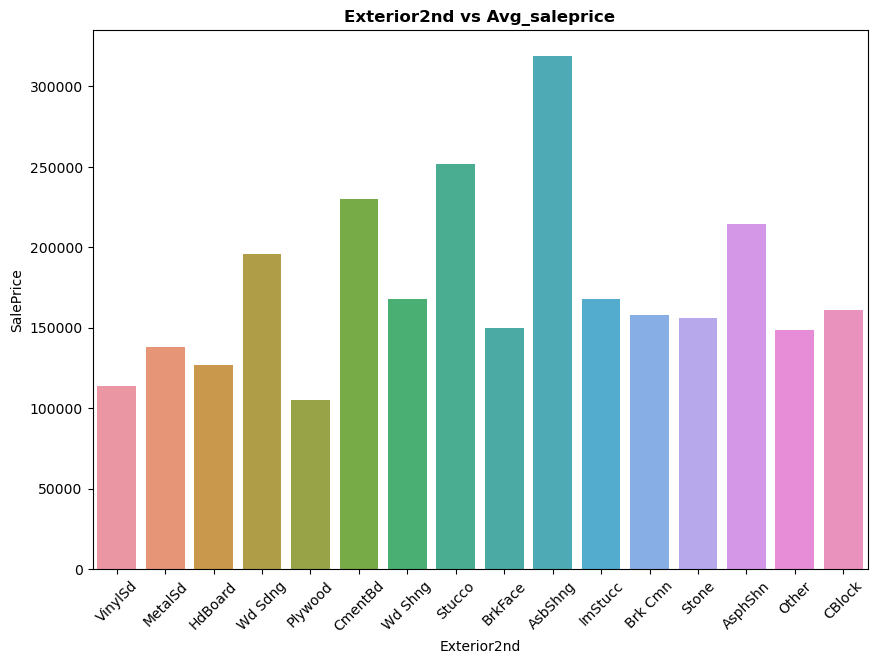

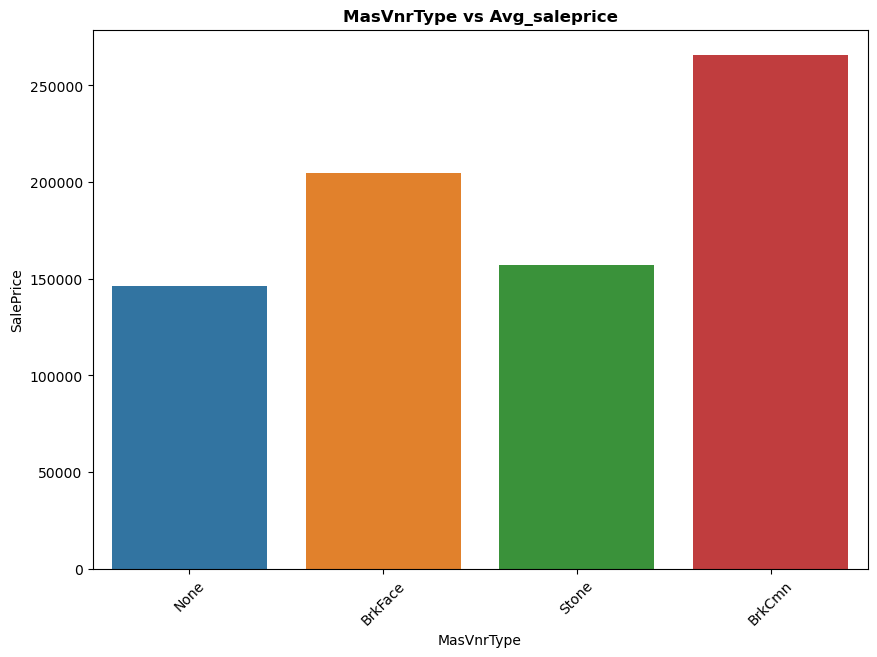

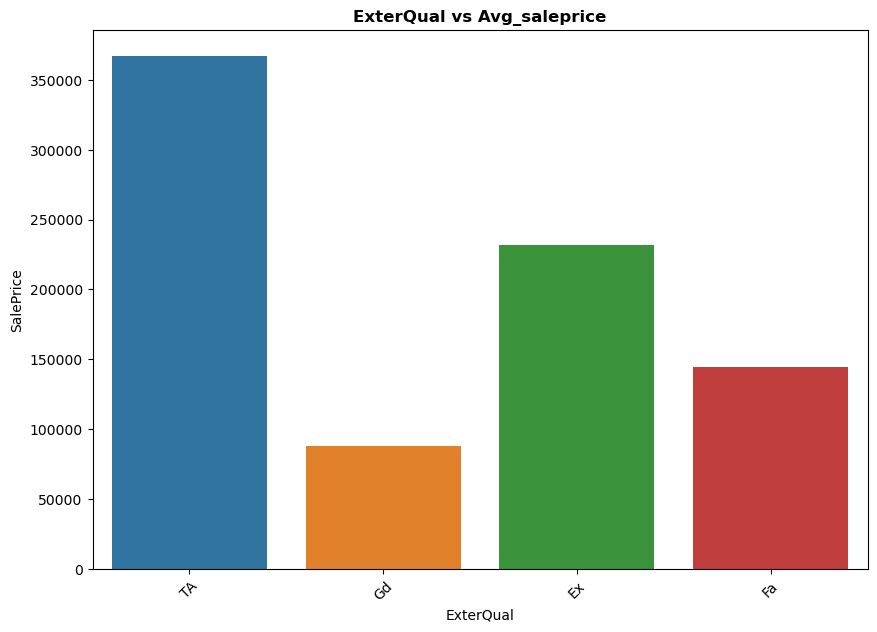

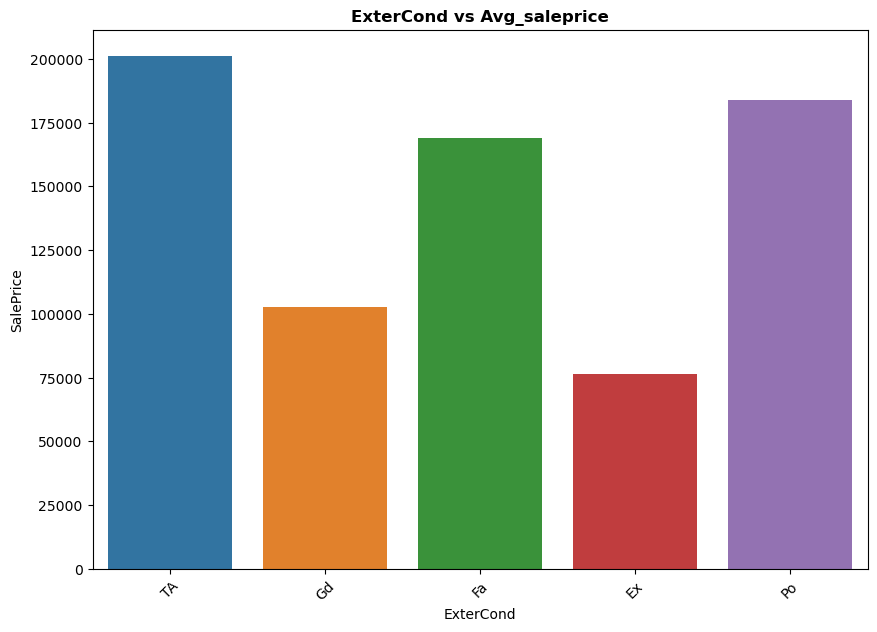

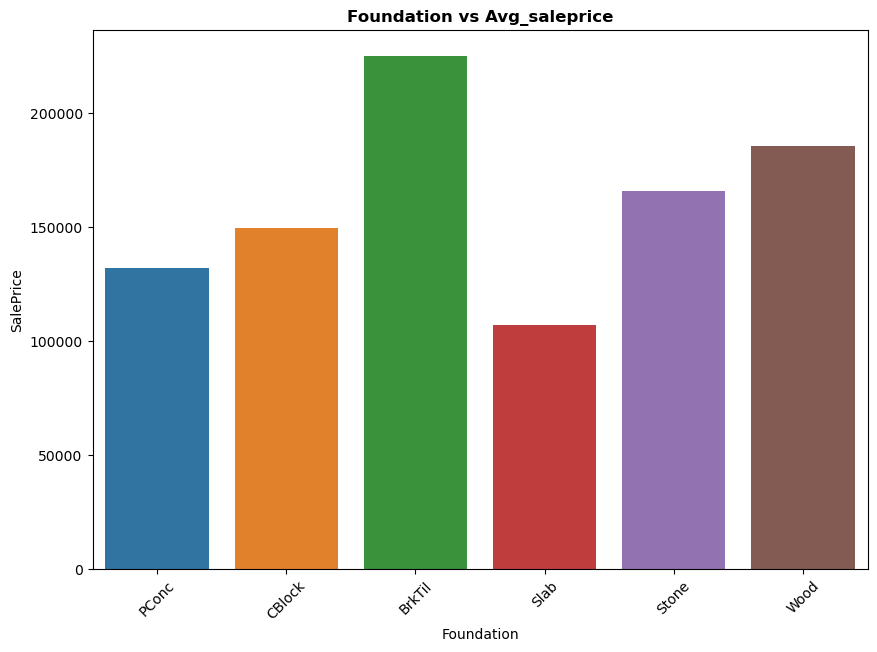

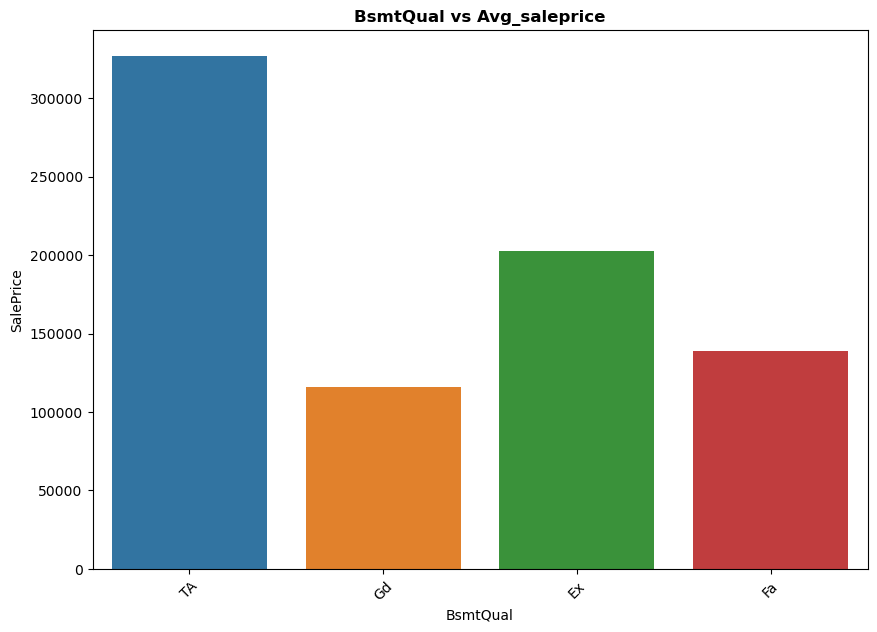

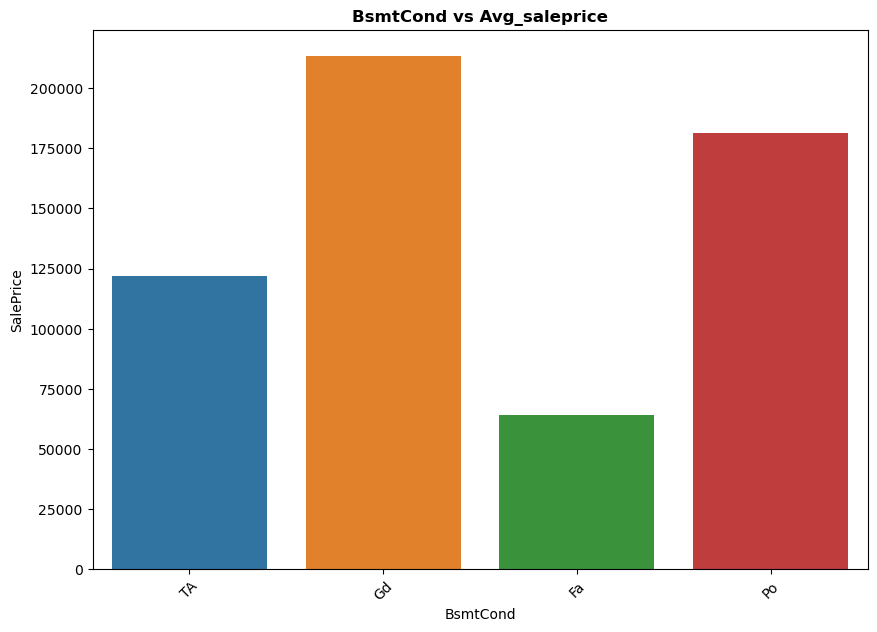

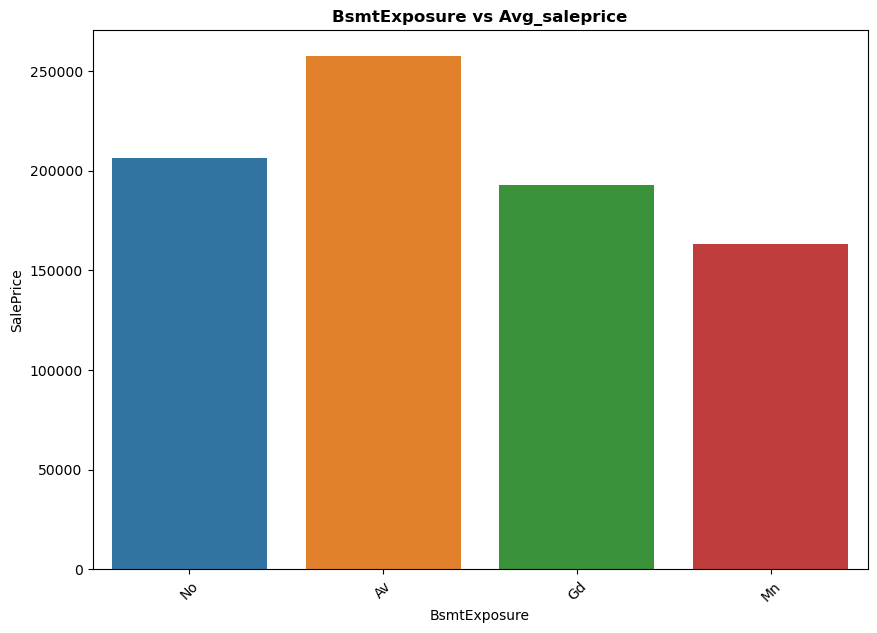

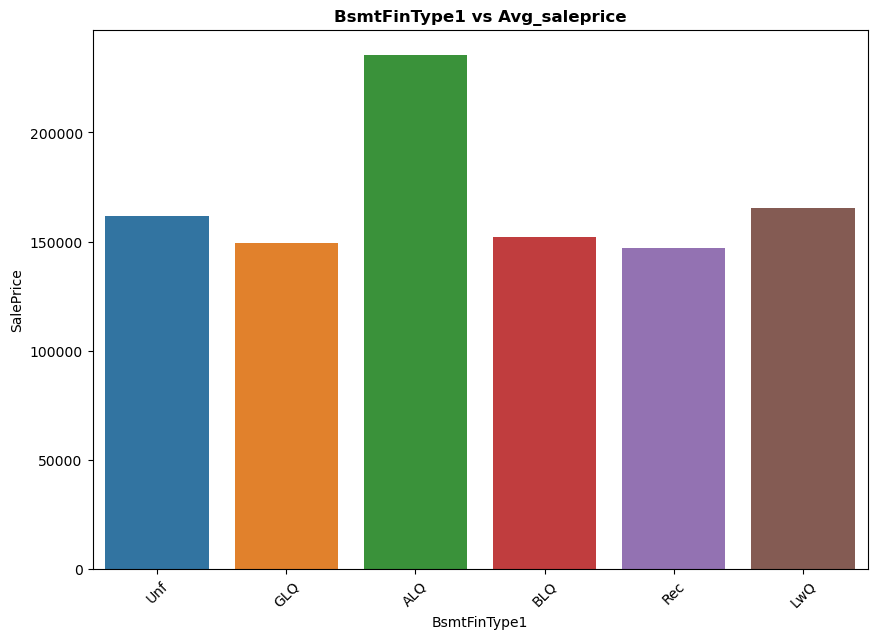

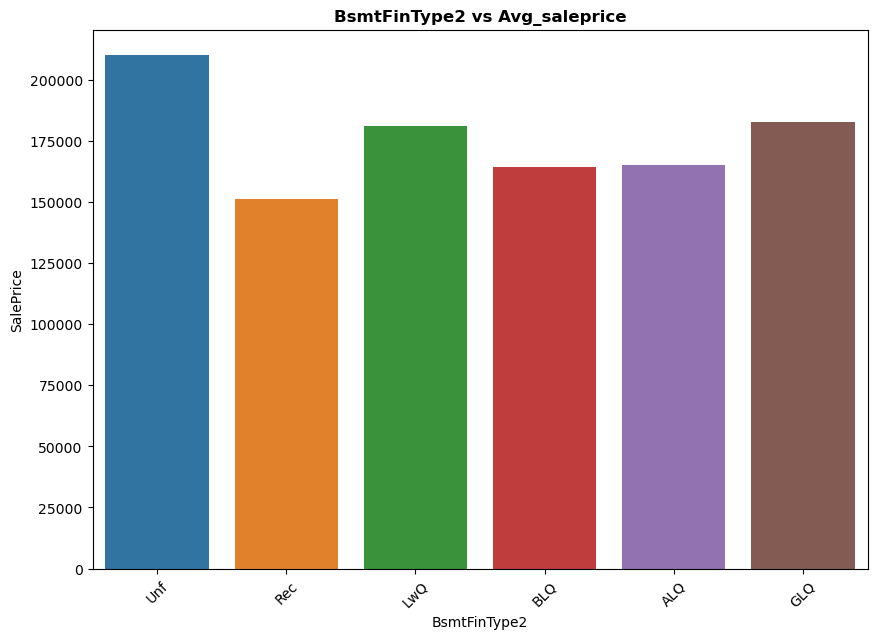

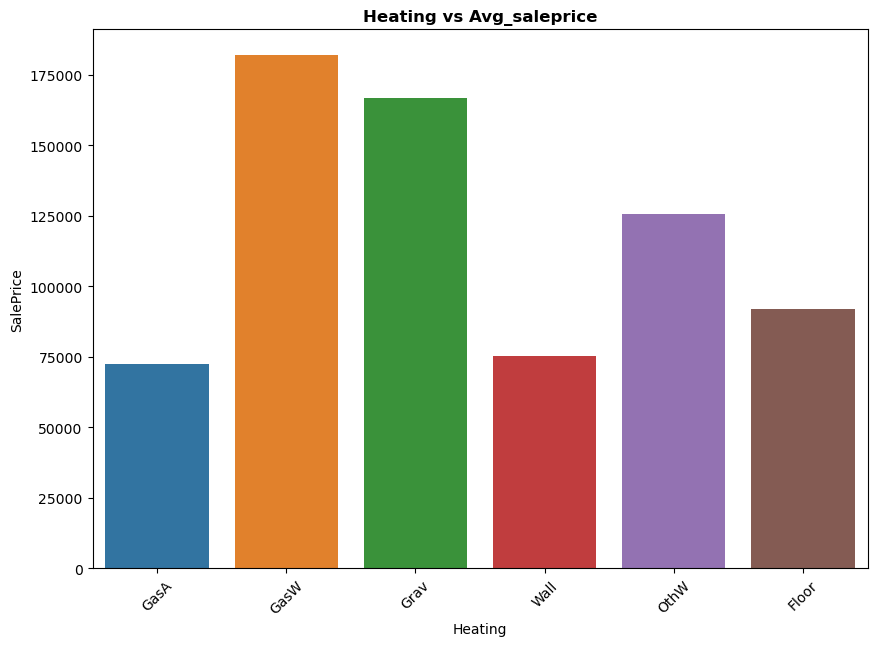

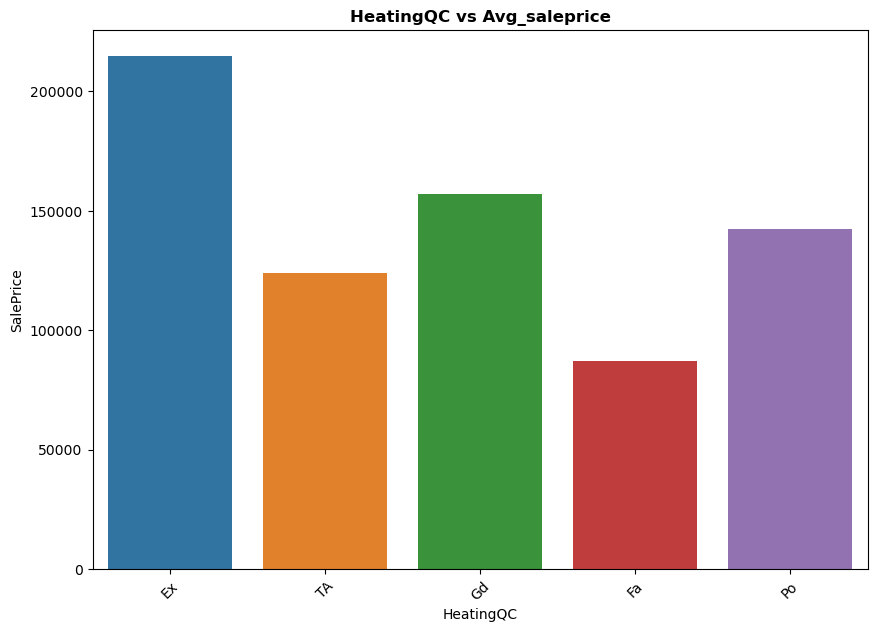

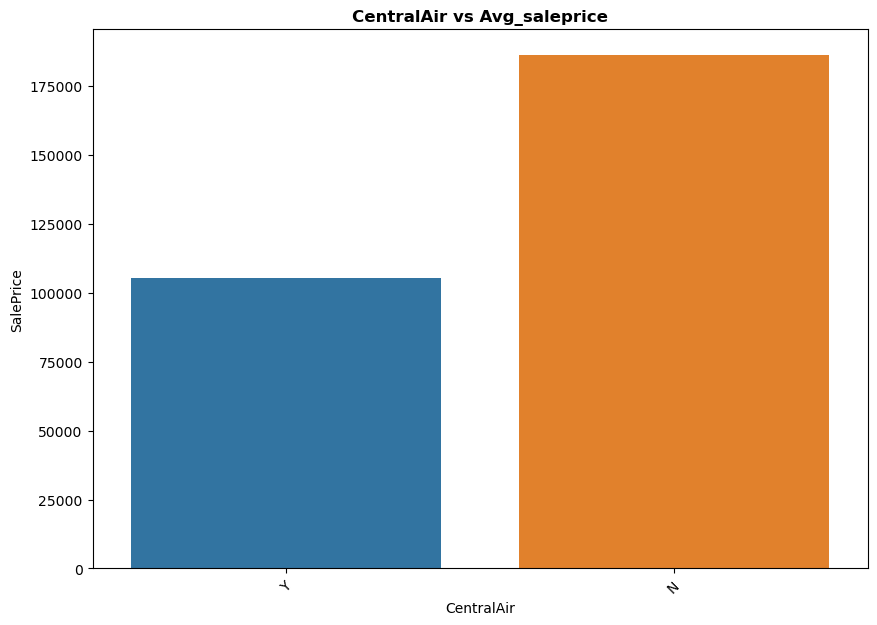

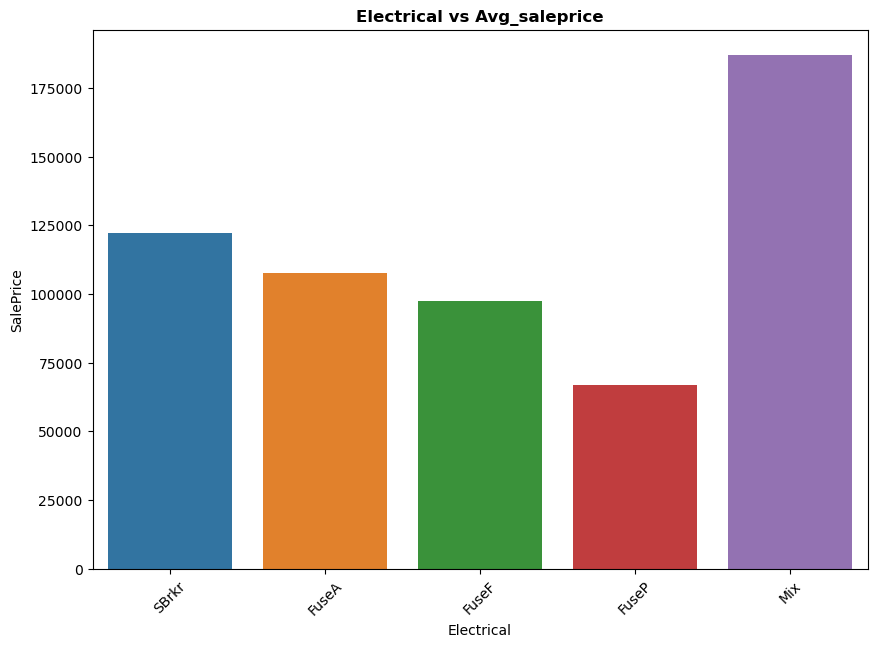

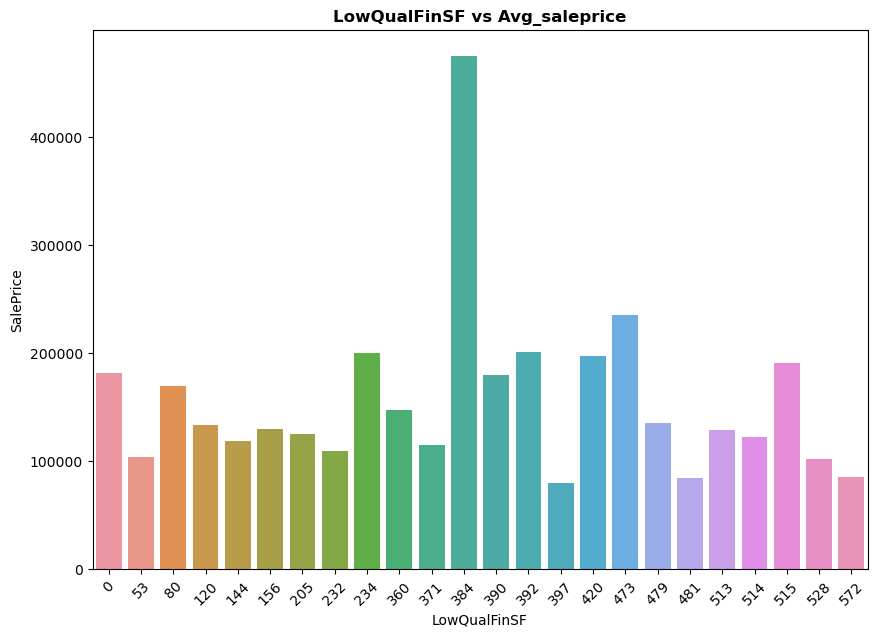

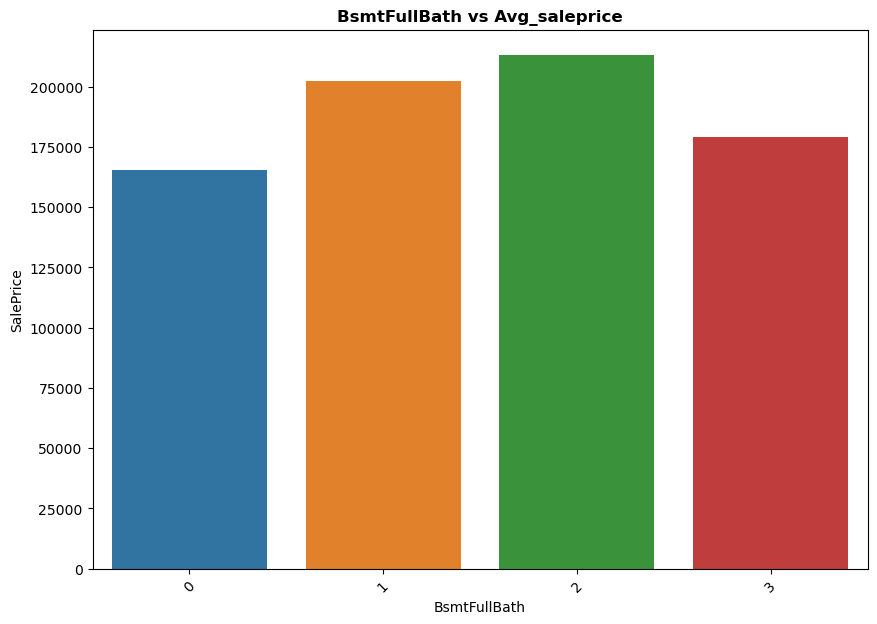

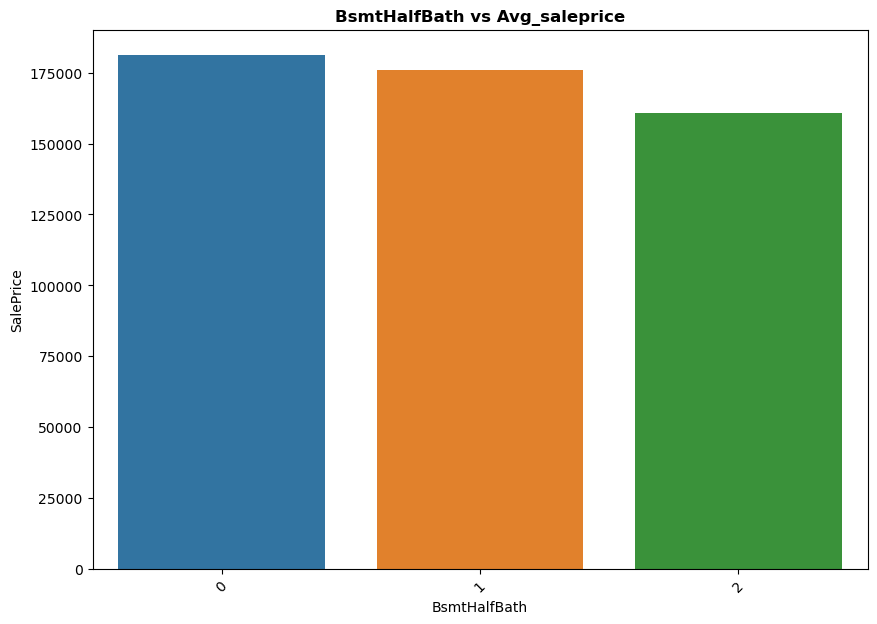

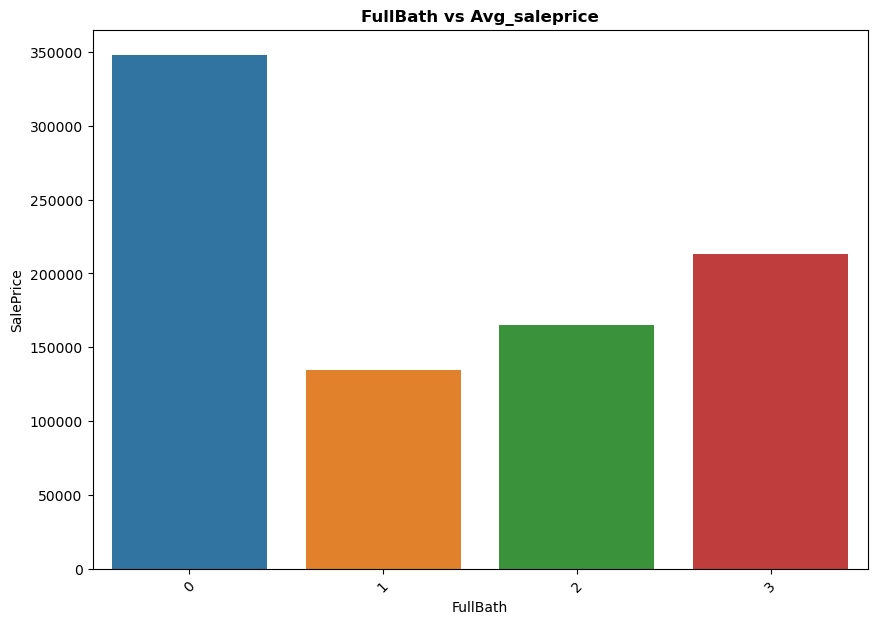

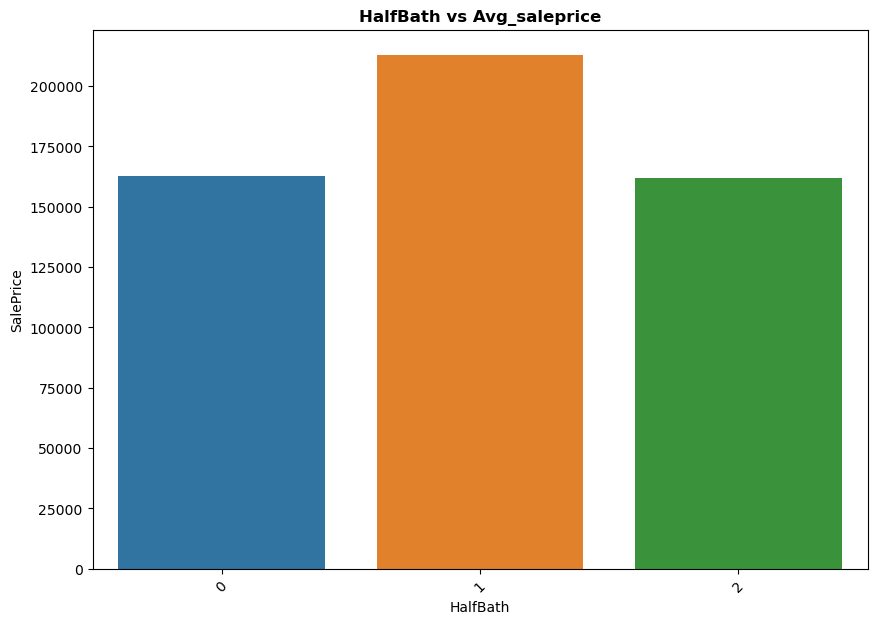

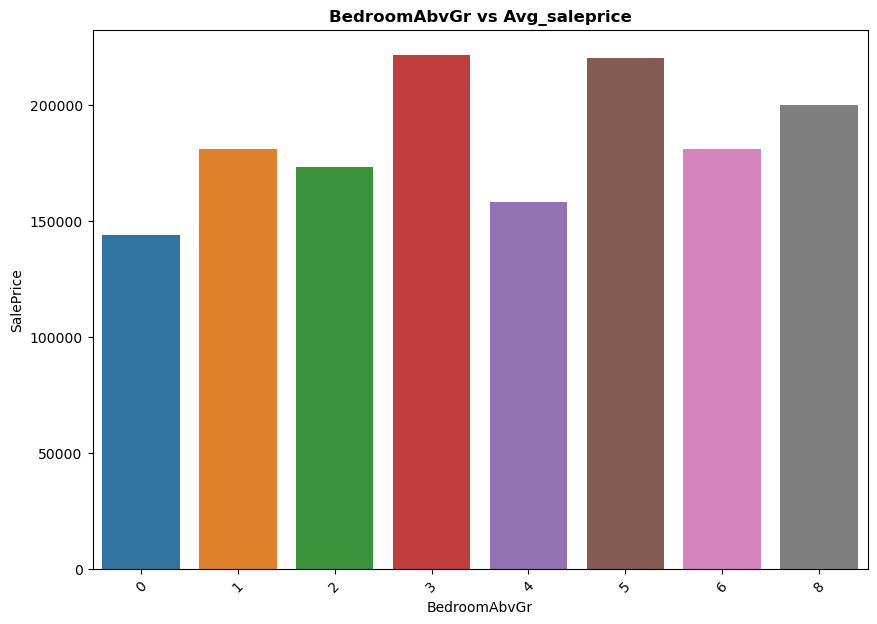

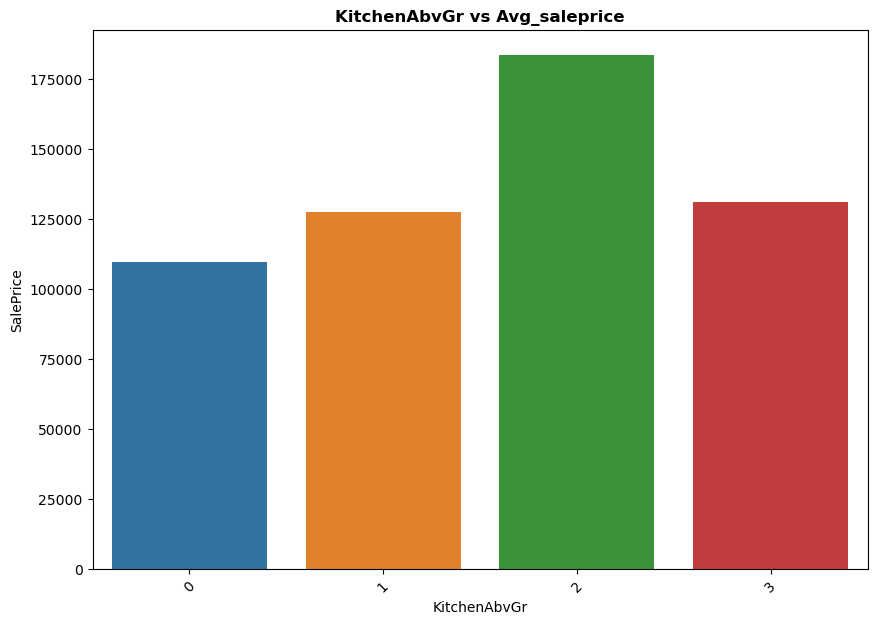

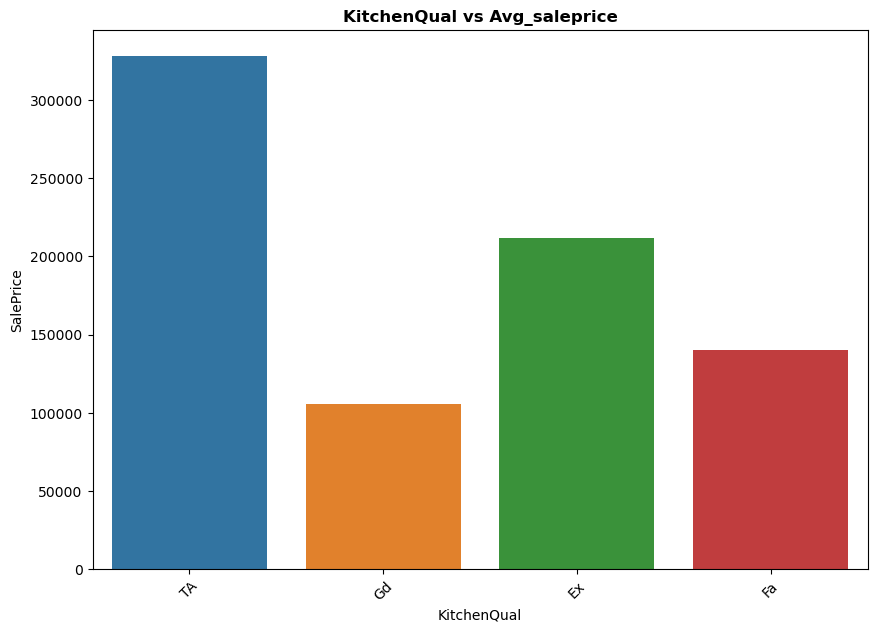

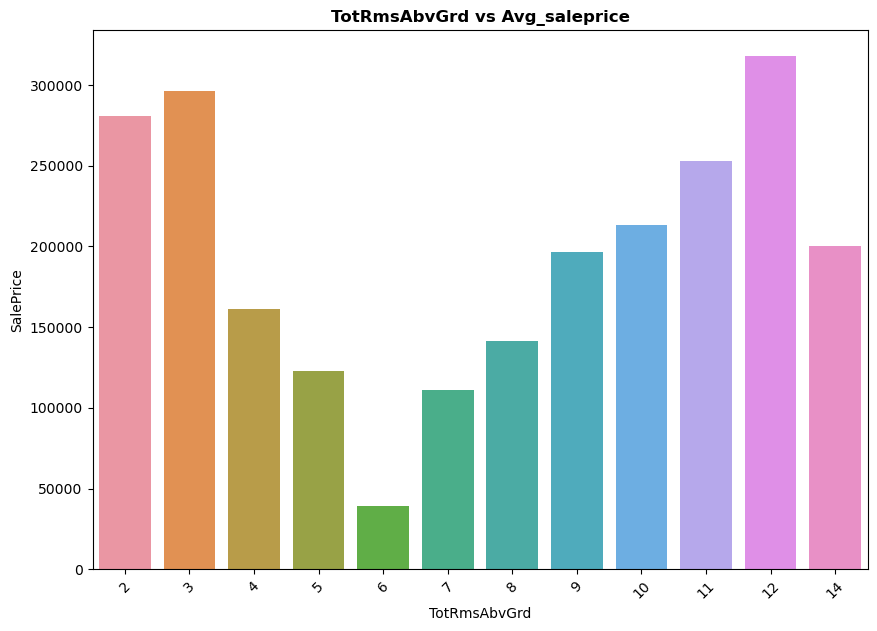

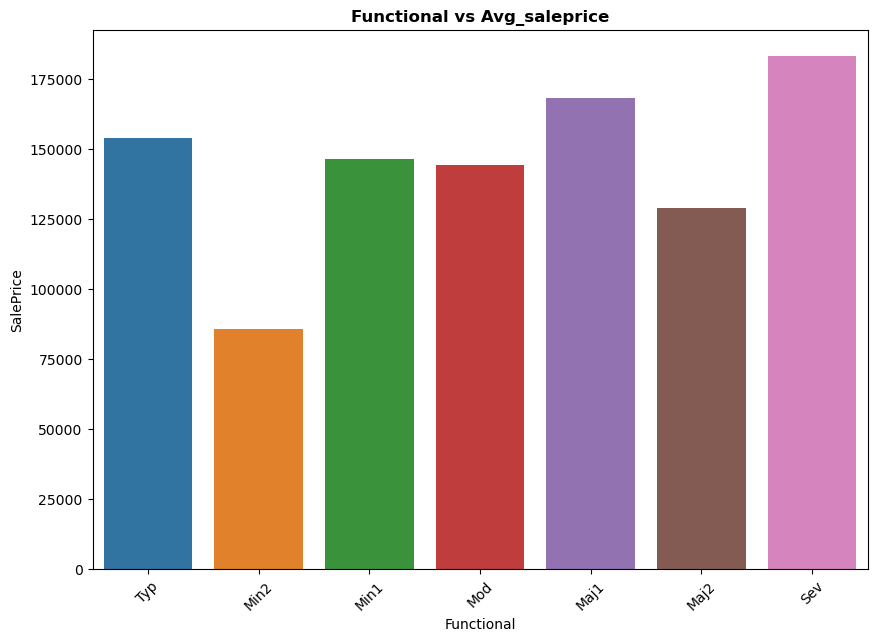

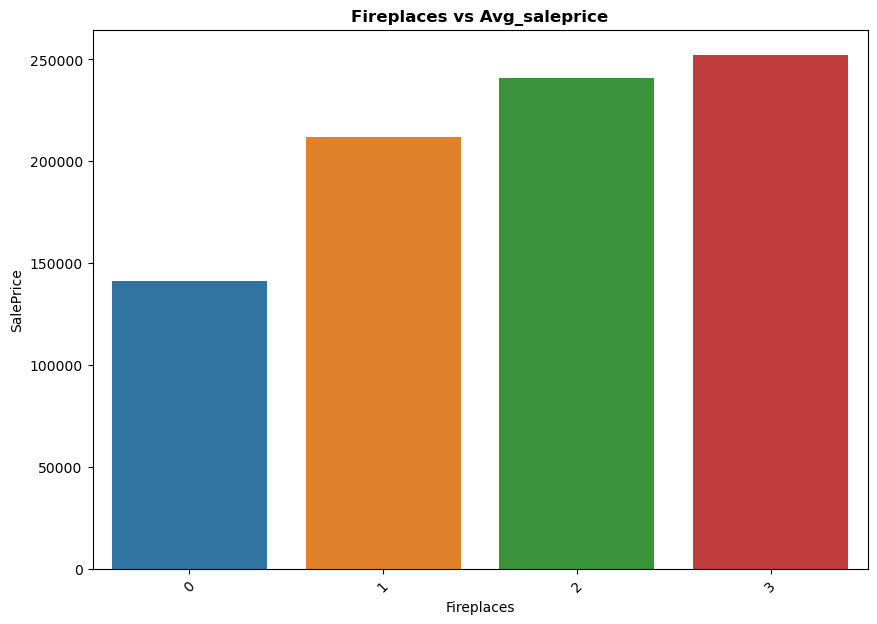

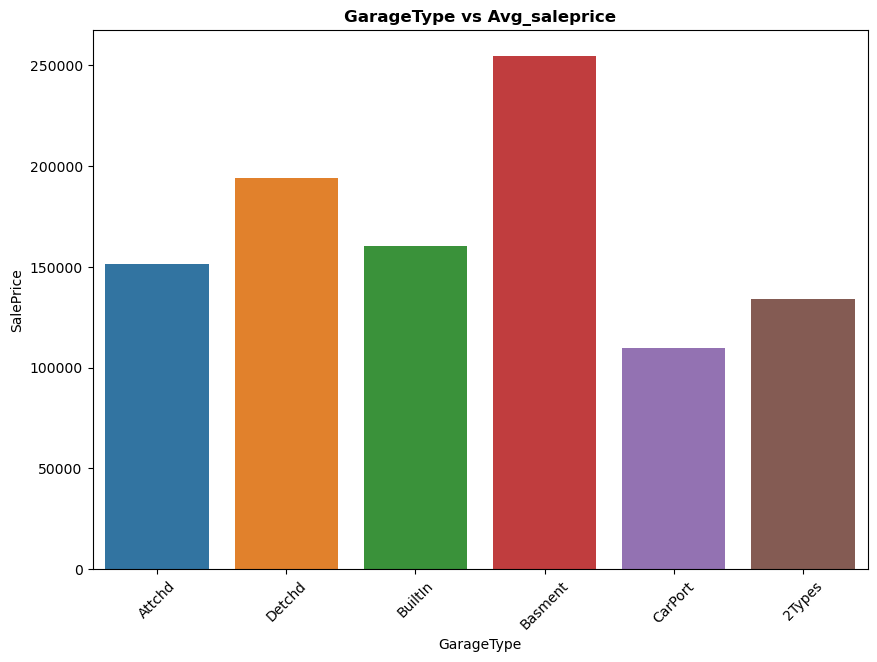

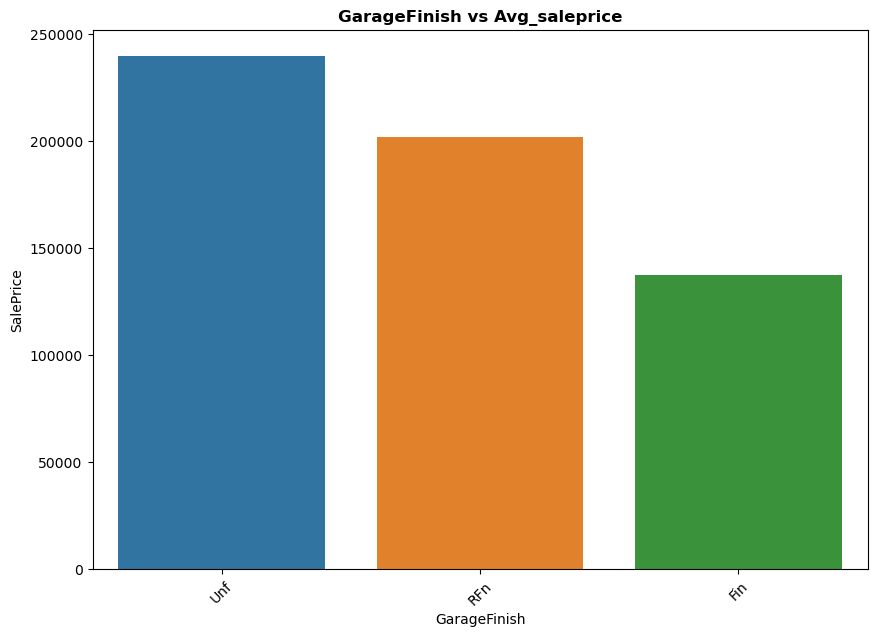

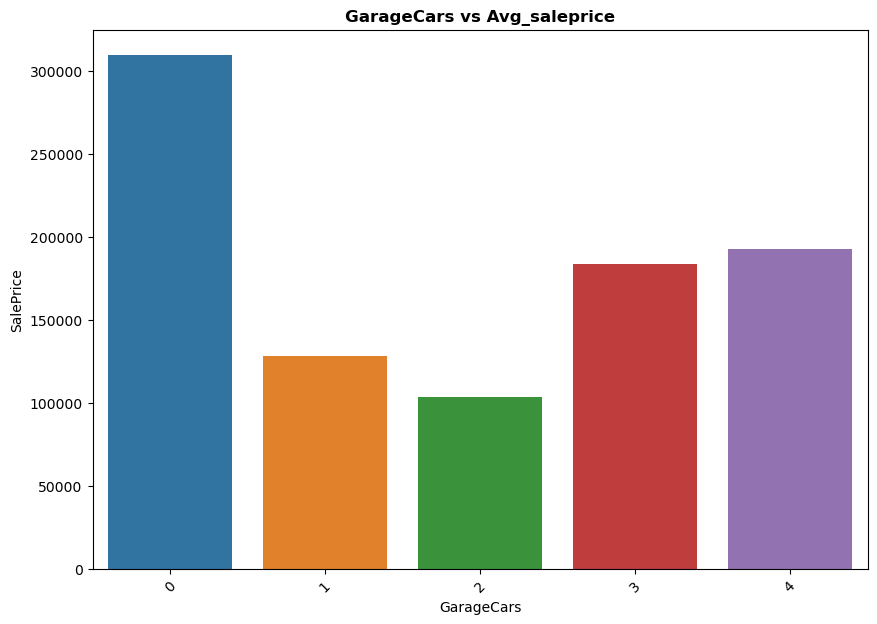

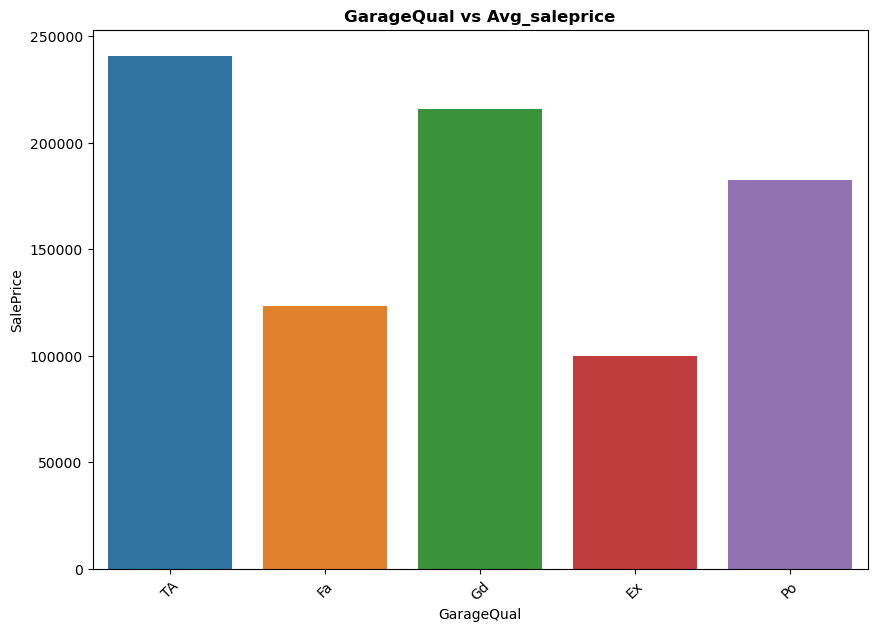

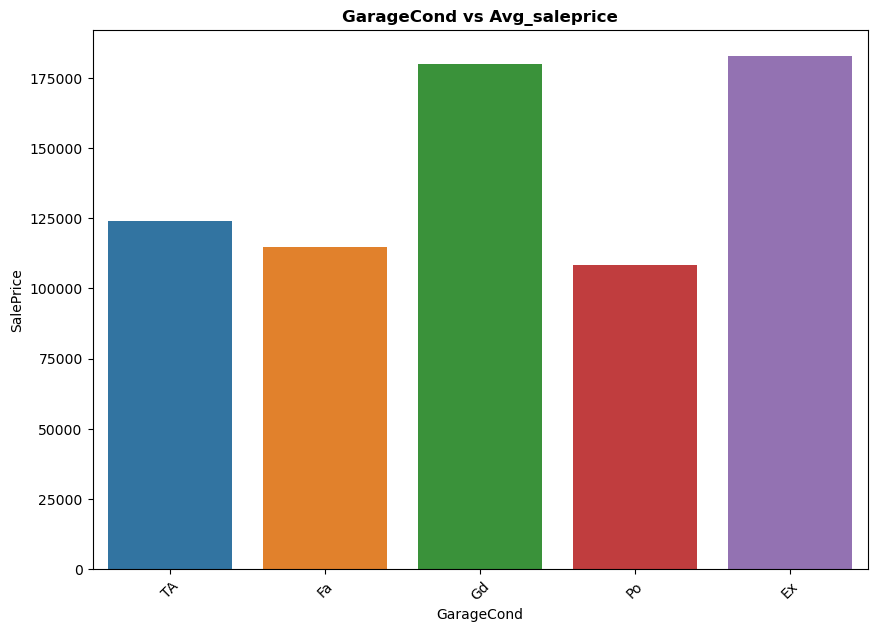

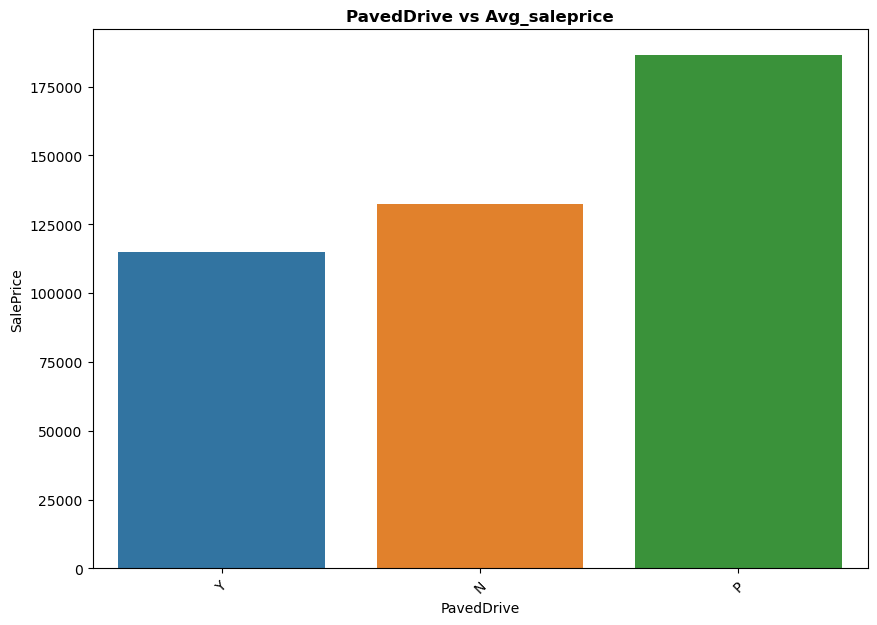

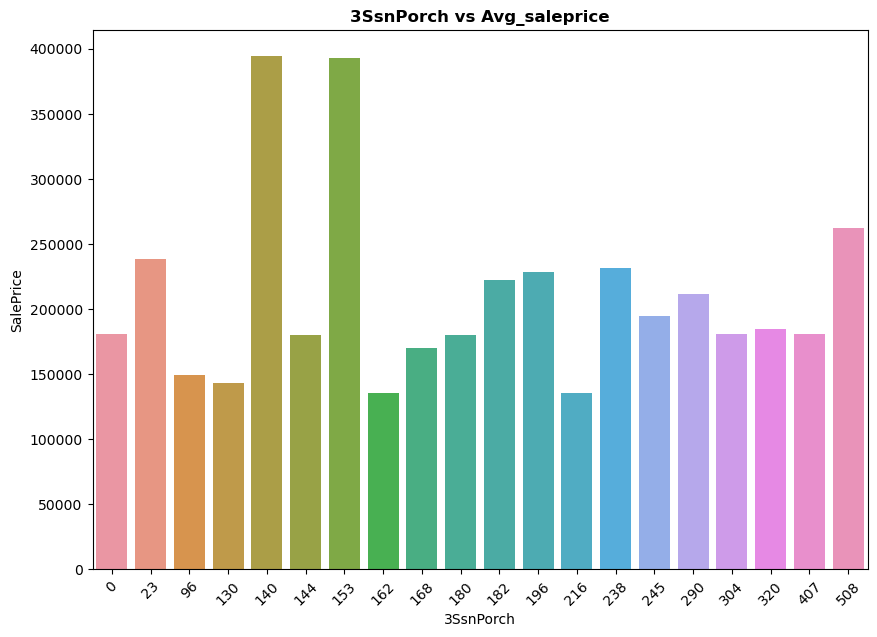

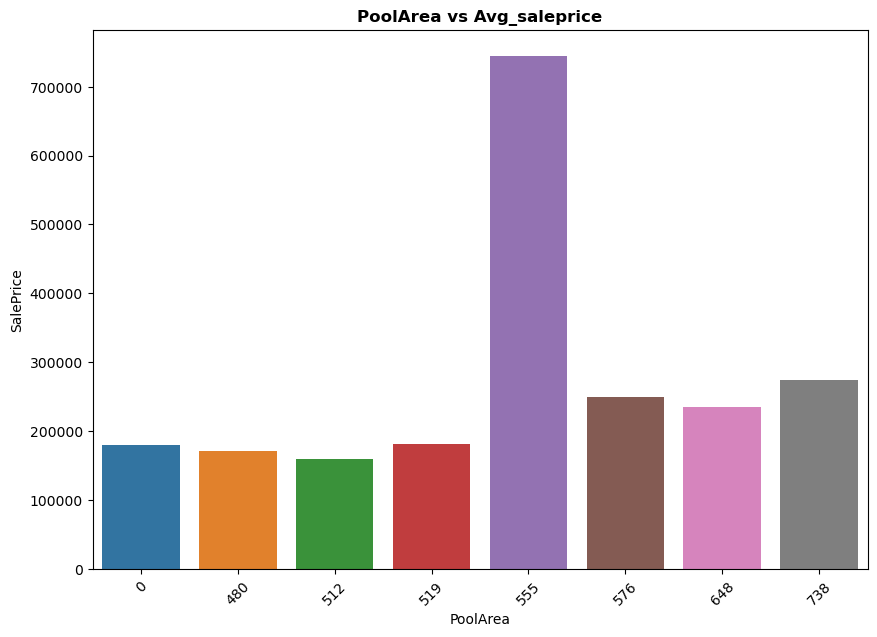

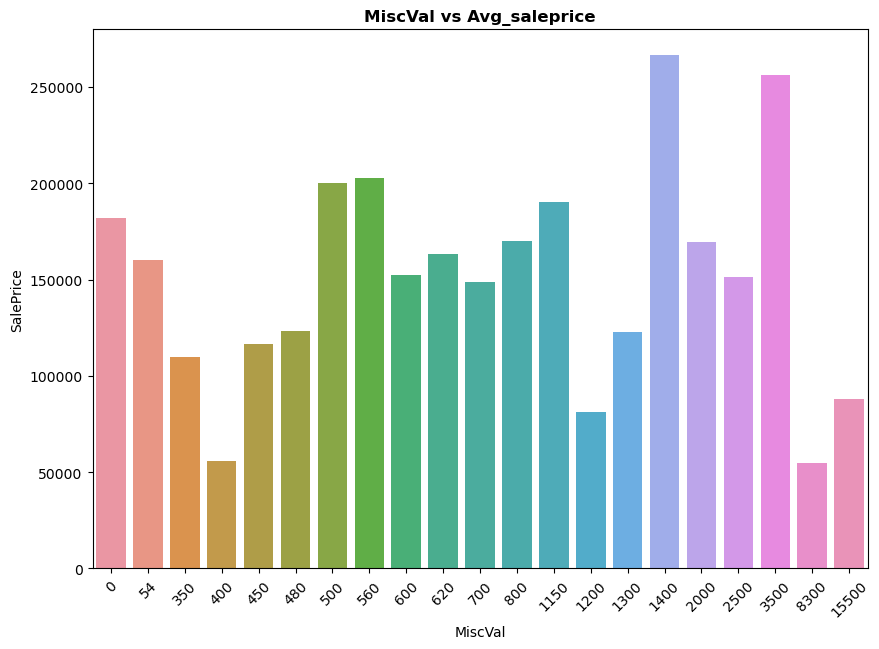

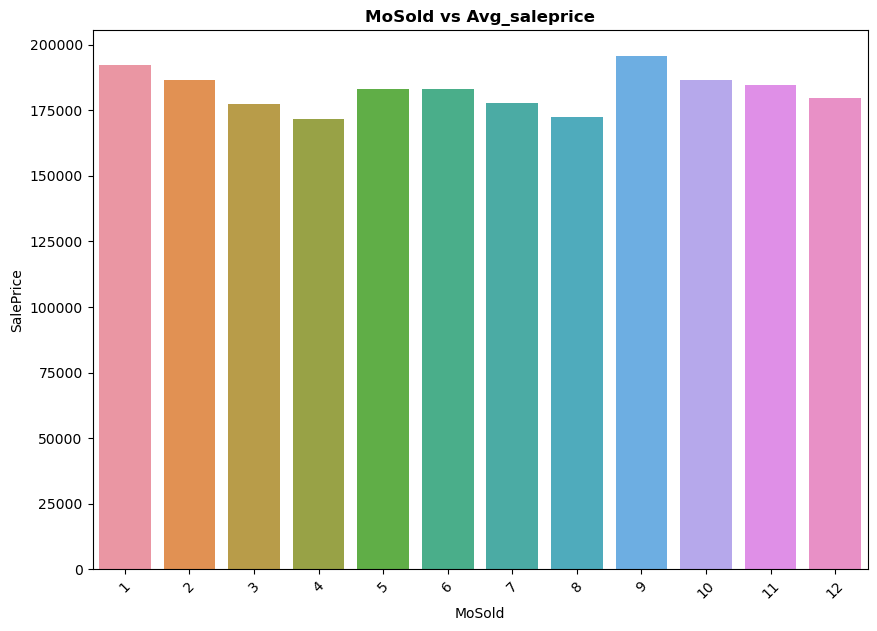

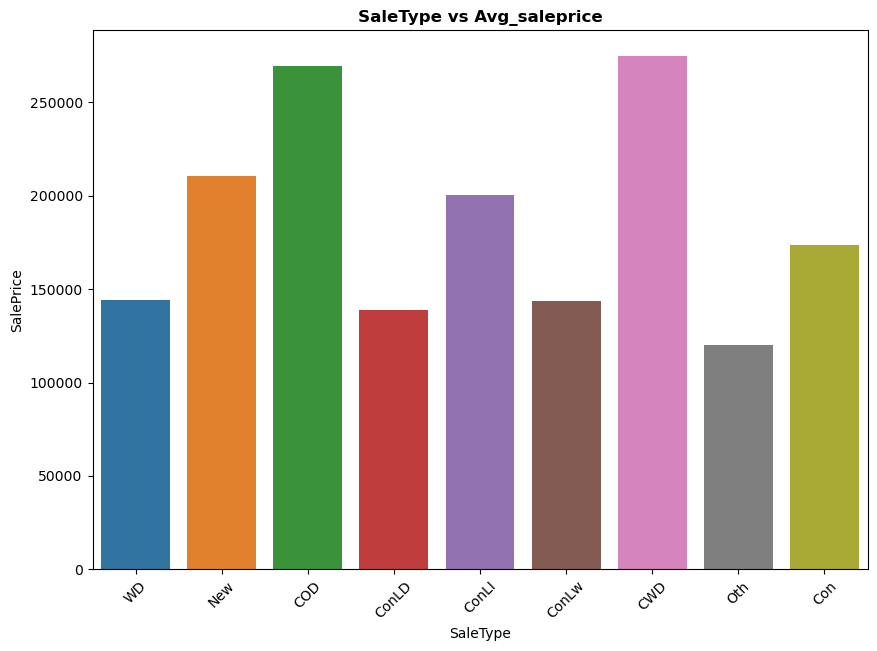

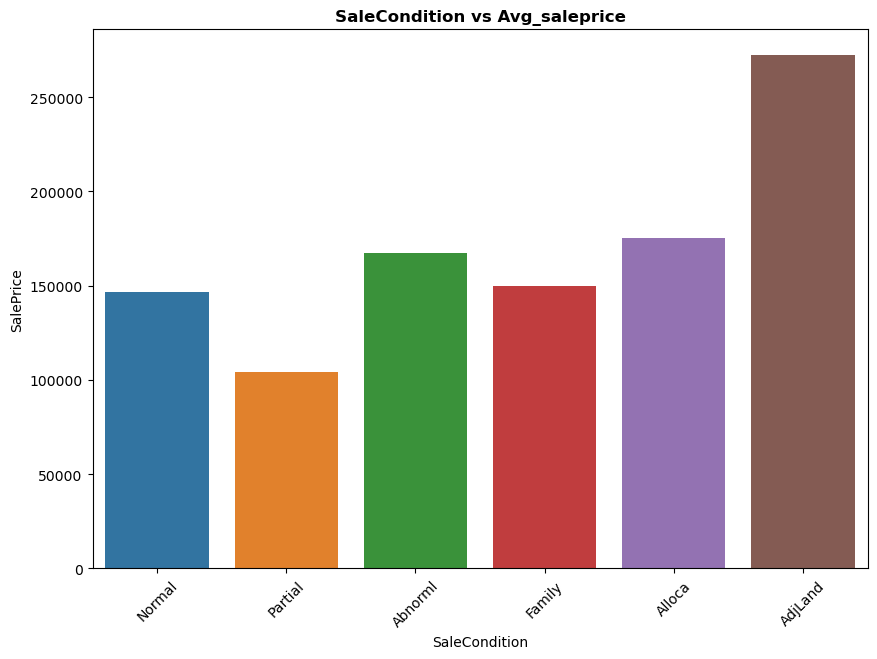

In [34]:
for column in categorical_cols:
    plt.figure(figsize=(10,7))
    sns.barplot(x=train_df[column].value_counts().index,y=train_df.groupby(column).mean()['SalePrice'])
    plt.xlabel(str(column))
    plt.title(str(column)+ " vs " + "Avg_saleprice",fontweight="bold")
    plt.xticks(rotation=45)

plot for continous data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

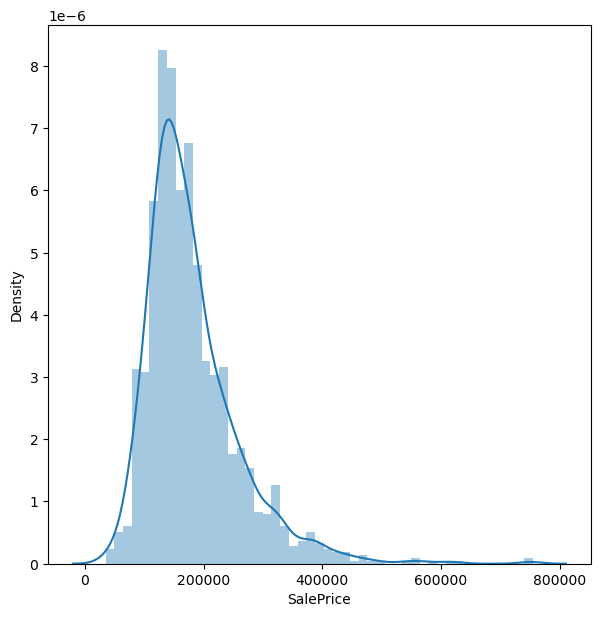

In [35]:
plt.figure(figsize=(7,7))
sns.distplot(train_df["SalePrice"])

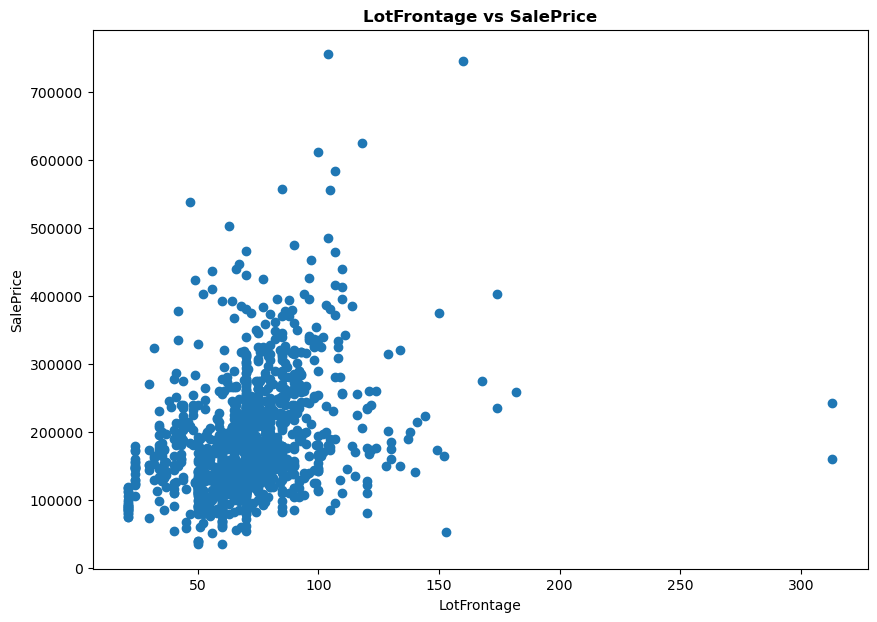

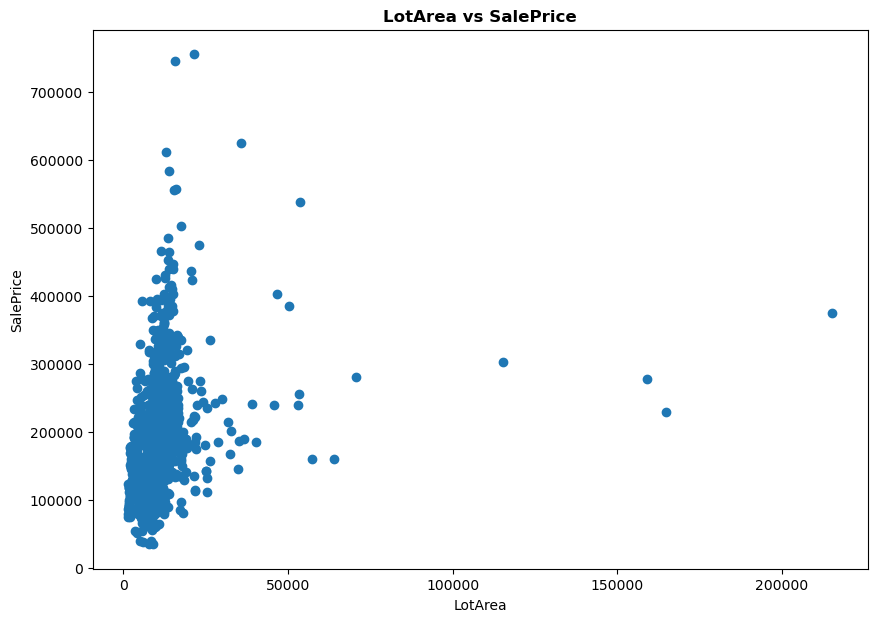

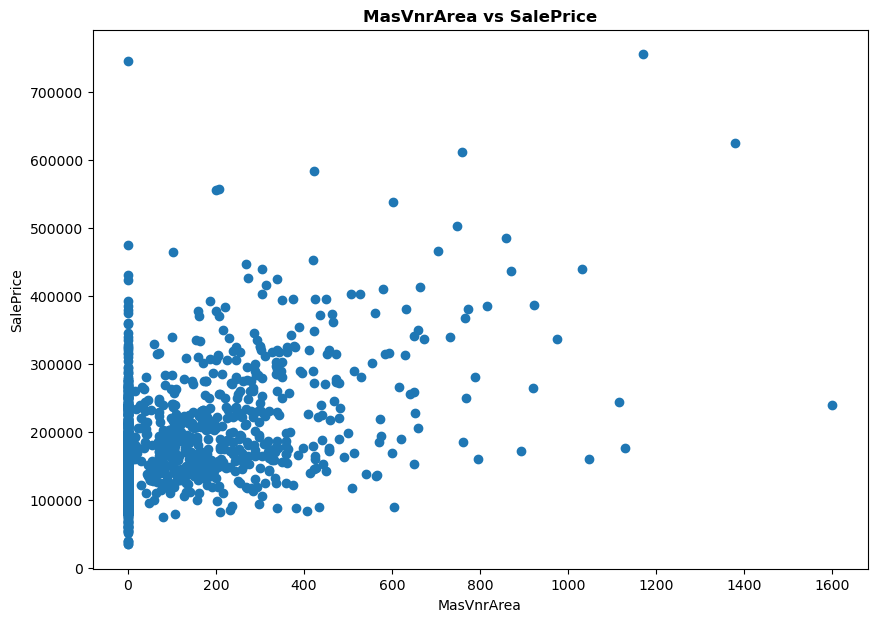

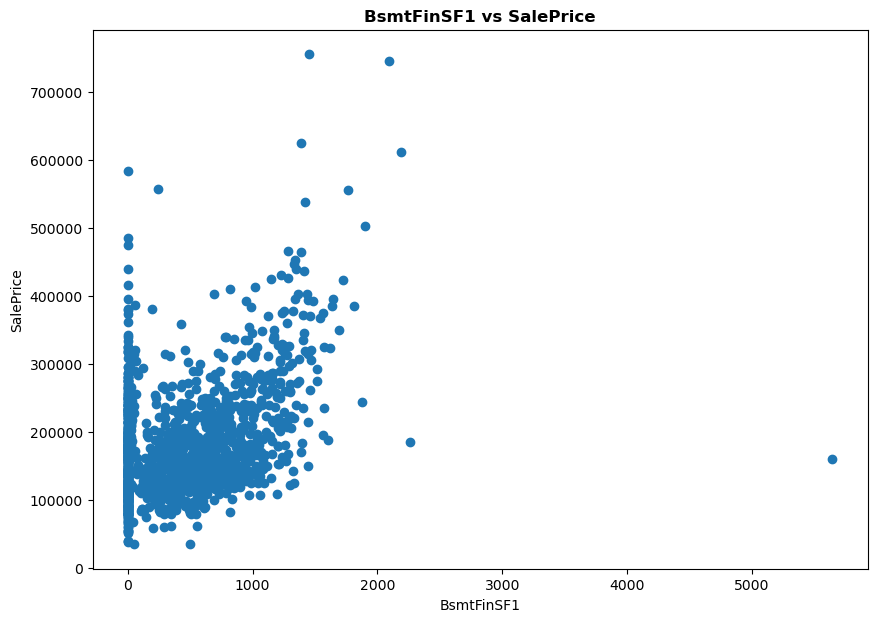

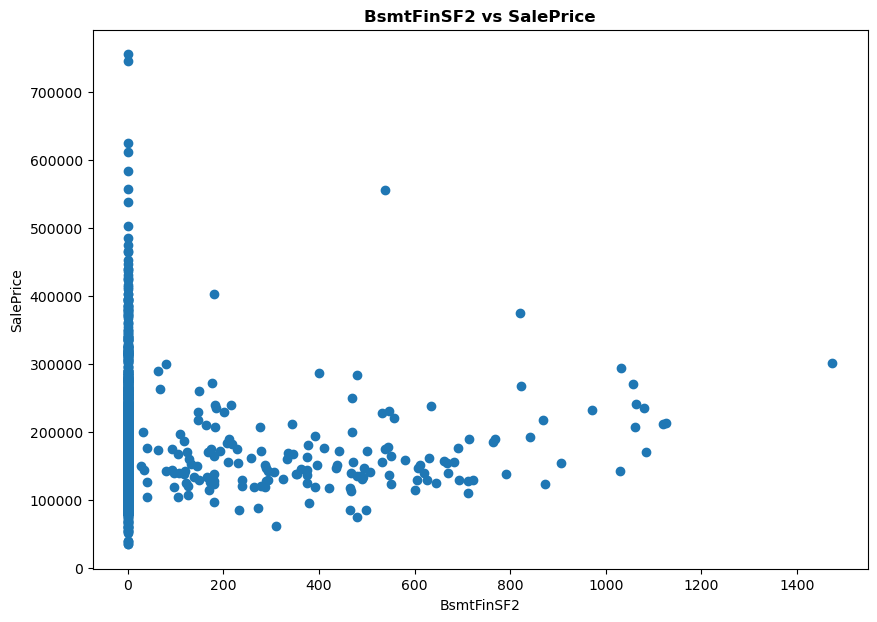

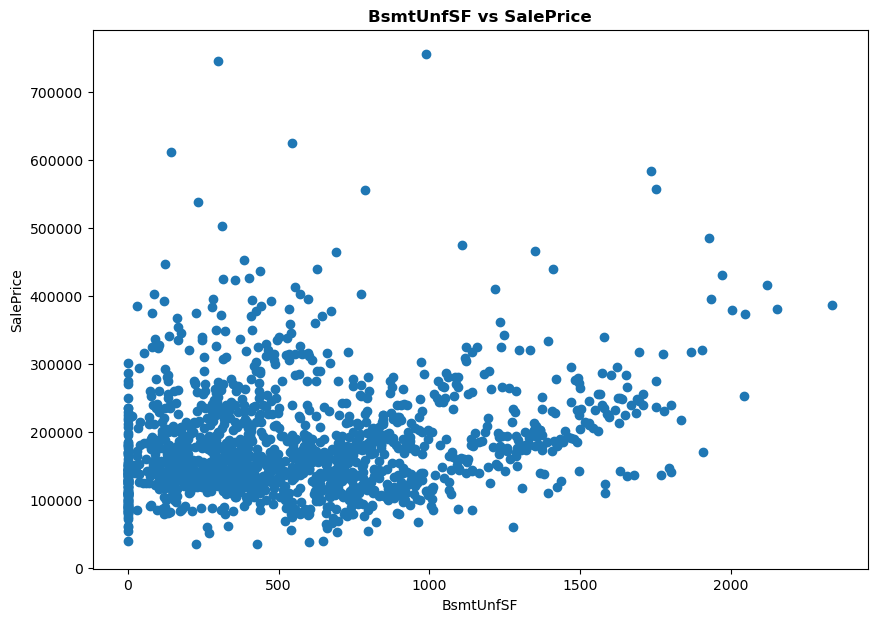

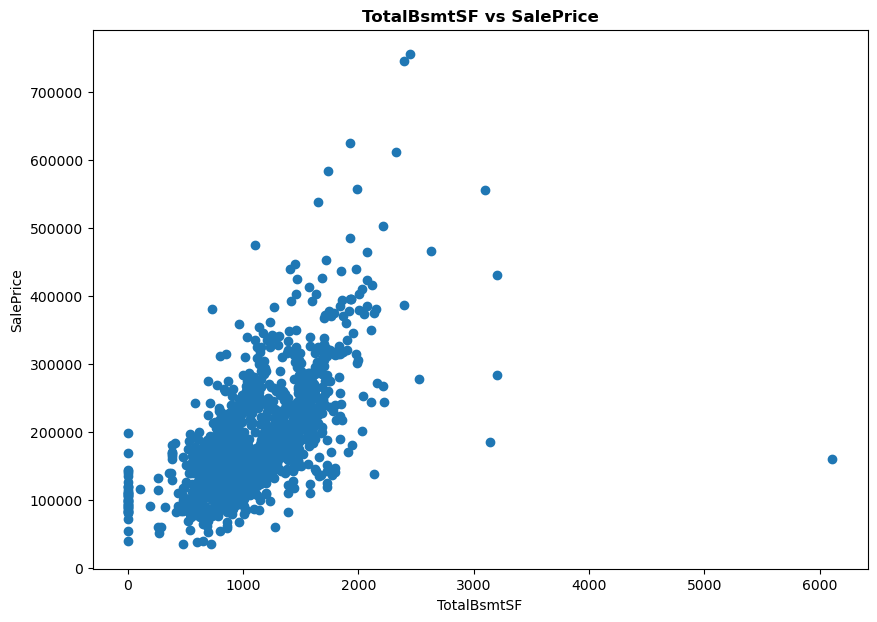

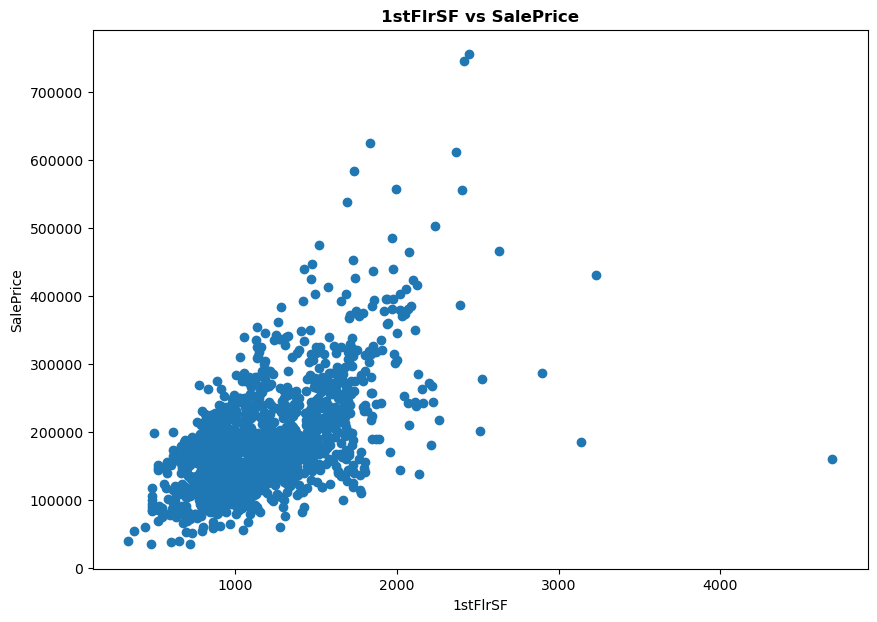

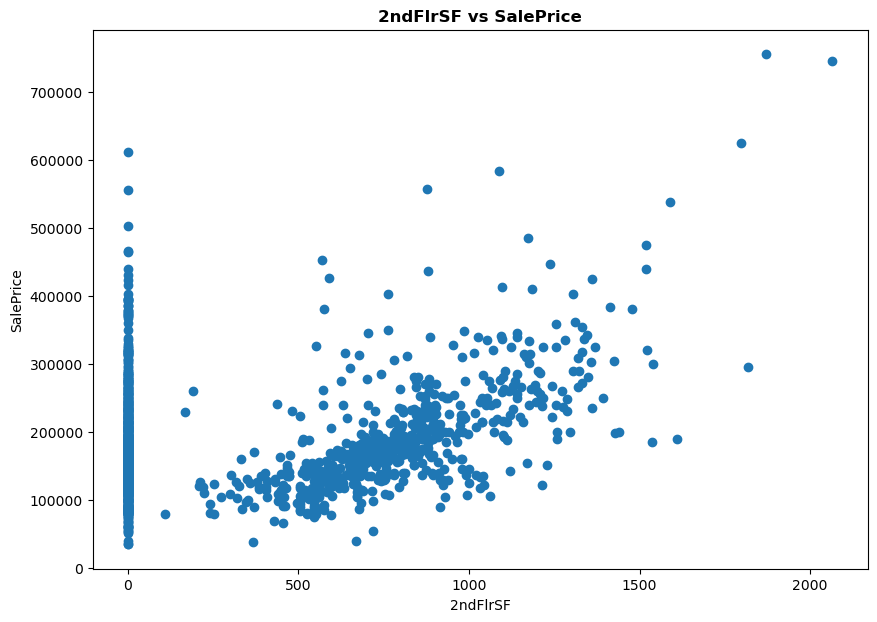

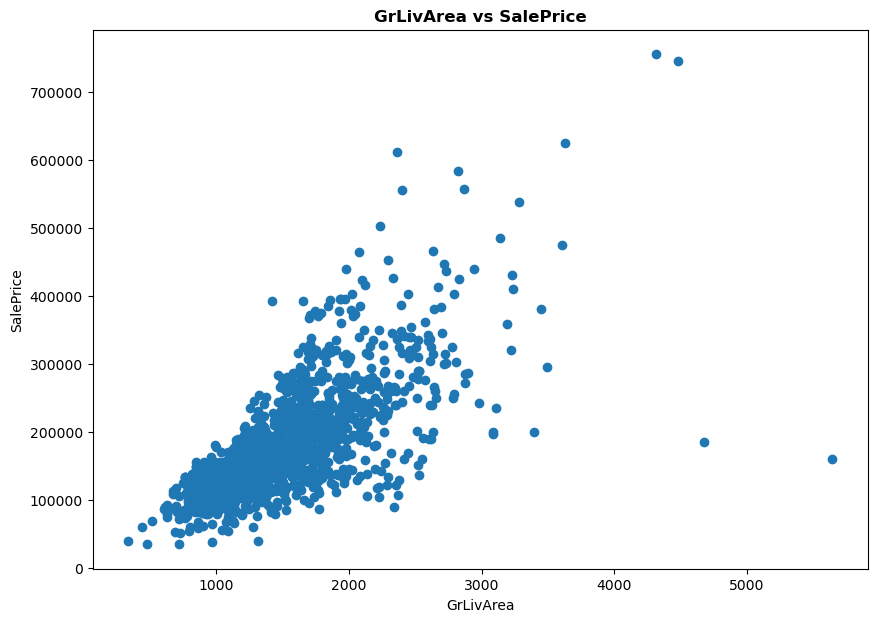

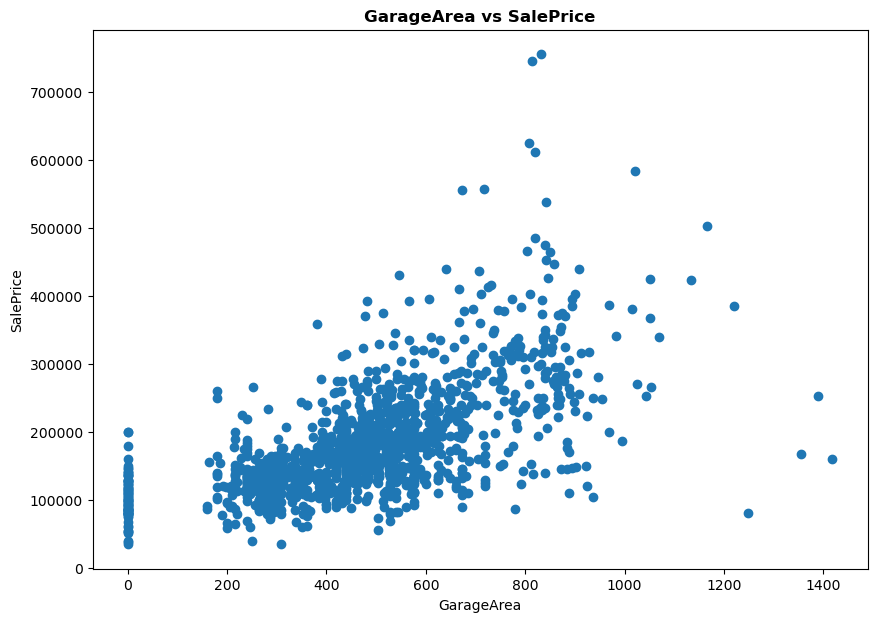

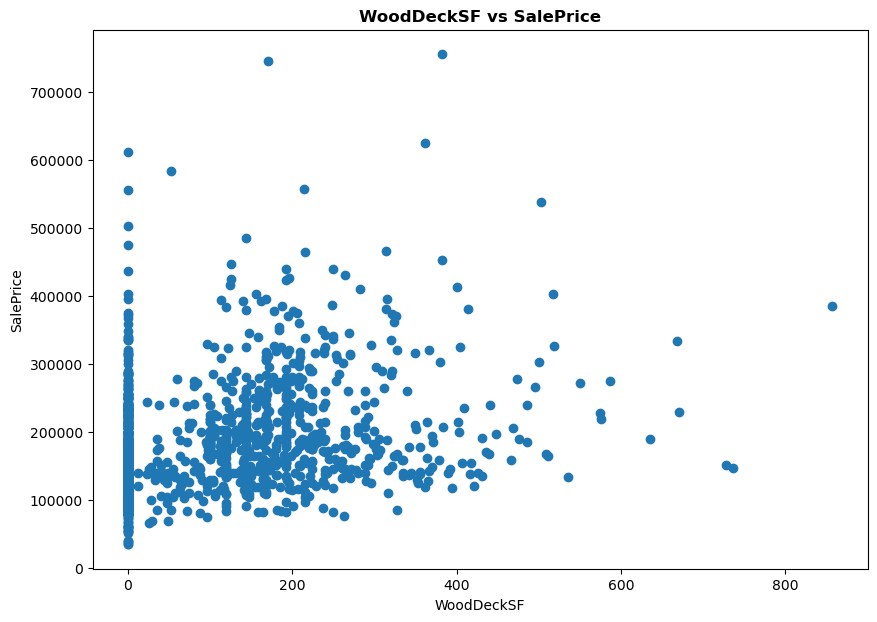

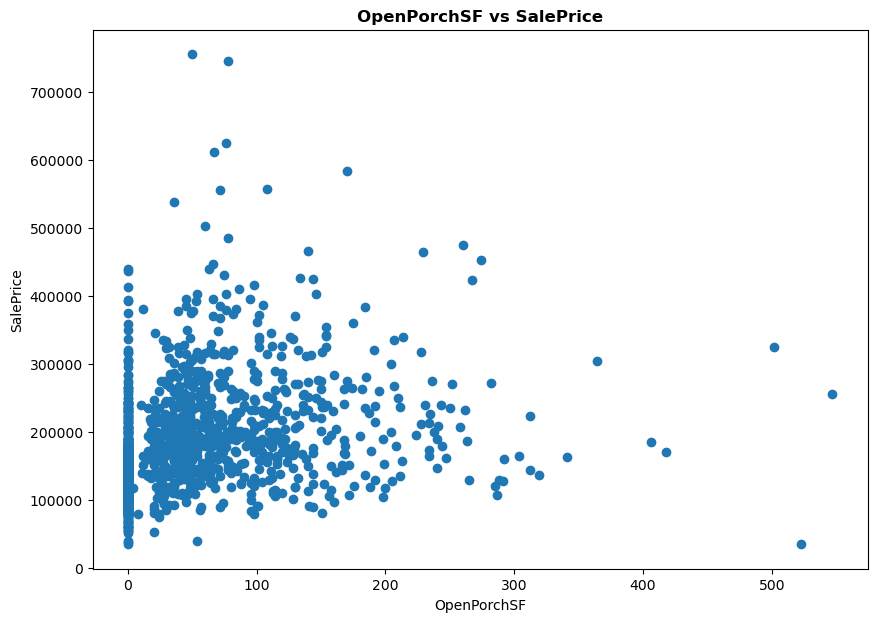

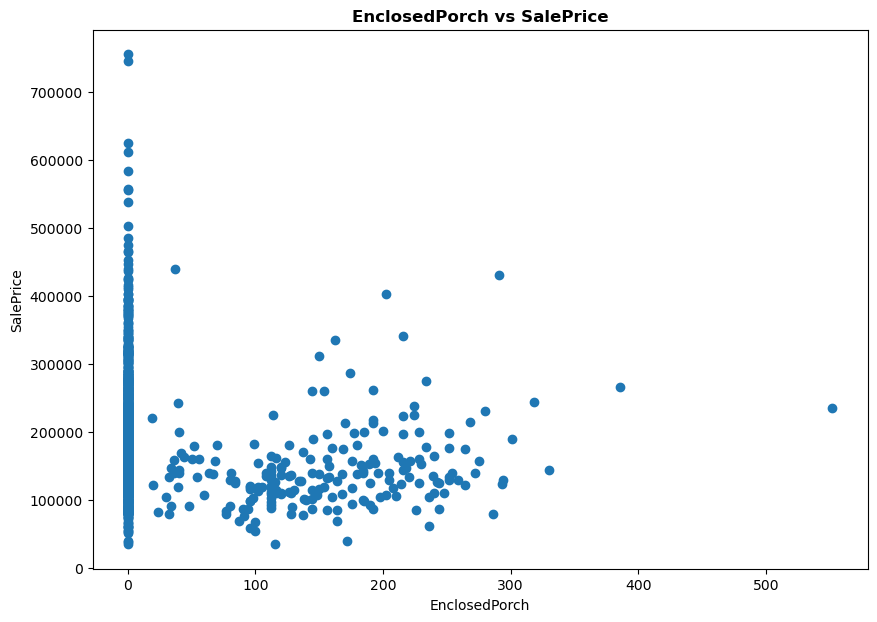

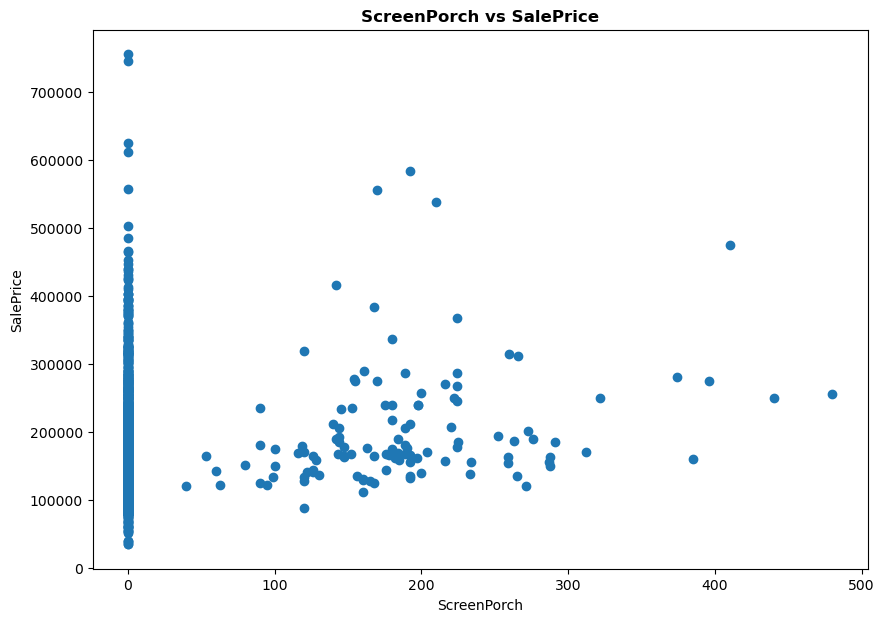

In [36]:
for column in continous_cols:
    plt.figure(figsize=(10,7))
    plt.scatter(train_df[column],train_df["SalePrice"])
    plt.xlabel(str(column))
    plt.ylabel("SalePrice")
    plt.title(column+" vs "+"SalePrice",fontweight="bold")

charts for year columns

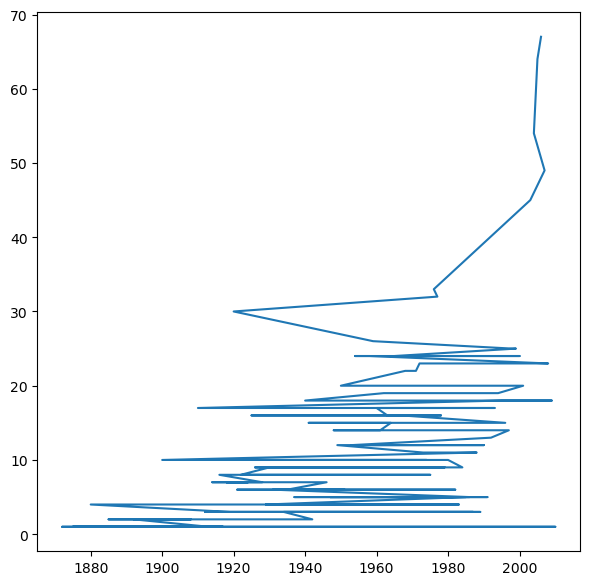

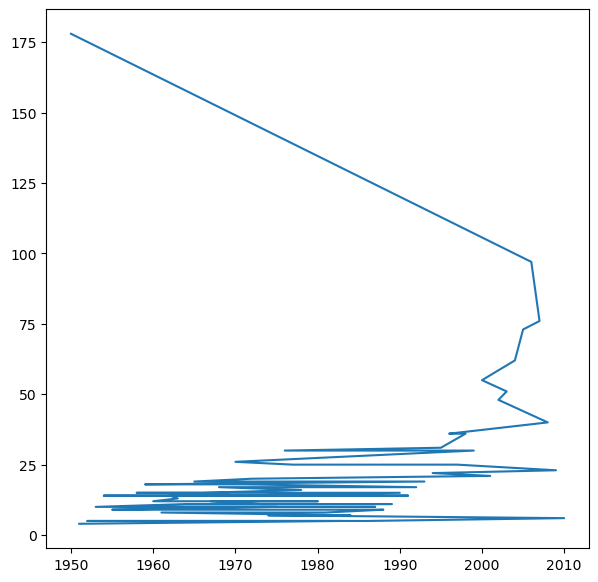

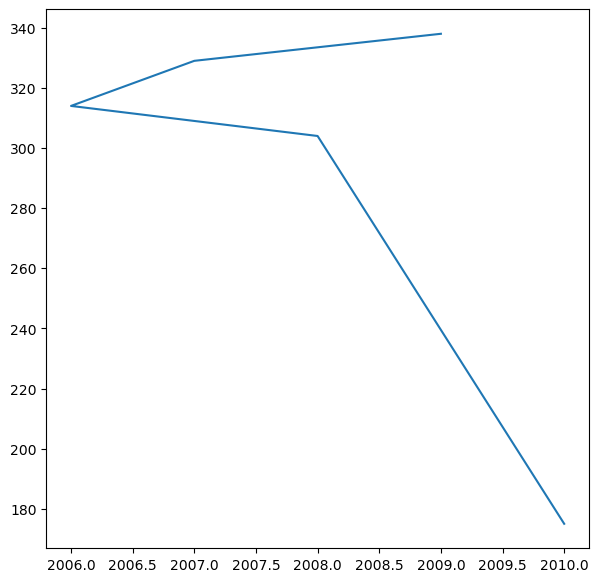

In [37]:
for column in year_columns:
    plt.figure(figsize=(7,7))
    plt.plot(train_df[column].value_counts())

In [38]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [39]:
train_df.shape,test_df.shape

((1460, 74), (1459, 73))

In [40]:
y=train_df["SalePrice"]

In [41]:
train_df=train_df.drop(["SalePrice"],axis=1)

In [42]:
final_df=pd.concat([train_df,test_df],axis=0)
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [43]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorc

In [44]:
final_df = final_df.replace({
                       "BsmtCond" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "BsmtExposure" : {"No" : 1, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 1, "Unf" : 1, "LwQ": 2, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 3, "GLQ" : 3},
                       "BsmtFinType2" : {"No" : 1, "Unf" : 1, "LwQ": 2, "Rec" : 2, "BLQ" : 3, 
                                         "ALQ" : 3, "GLQ" : 3},
                       "BsmtQual" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA": 2, "Gd" : 3, "Ex" : 3},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 3, "Ex" : 3},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 2, "Gd": 3, "Ex" : 3},
                       "FireplaceQu" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "Functional" : {"Sal" : 1, "Sev" : 1, "Maj2" : 2, "Maj1" : 2, "Mod": 3, 
                                       "Min2" : 3, "Min1" : 3, "Typ" : 4},
                       "GarageCond" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "GarageQual" : {"No" : 1, "Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 1, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 3},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                       "OverallQual":{1 : 1, 2 : 1, 3 : 1,  4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3 },
                       'OverallCond':{1 : 1, 2 : 1, 3 : 1,  4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3 }}
                     )

In [45]:
final_df=pd.get_dummies(data=final_df,columns=['MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition'],drop_first=True)


In [46]:
final_df.shape

(2919, 361)

In [47]:
train_df=final_df.iloc[:1460,:]
train_df

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,4,4,3,3,2,2003,2003,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,2,4,4,3,2,3,1976,1976,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2,3,4,3,3,2,2001,2002,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,2,3,4,3,3,2,1915,1970,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,3,4,3,3,2,2000,2000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2,4,4,3,2,2,1999,2000,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,2,4,4,3,2,2,1978,1988,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,2,4,4,3,3,3,1941,2006,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,2,4,4,3,2,2,1950,1996,...,0,0,0,0,1,0,0,0,1,0


In [48]:
test_df=final_df.iloc[1460:,:]
test_df

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,2,4,4,3,2,2,1961,1961,...,0,0,0,0,1,0,0,0,1,0
1,81.0,14267,2,3,4,3,2,2,1958,1958,...,0,0,0,0,1,0,0,0,1,0
2,74.0,13830,2,3,4,3,2,2,1997,1998,...,0,0,0,0,1,0,0,0,1,0
3,78.0,9978,2,3,4,3,2,2,1998,1998,...,0,0,0,0,1,0,0,0,1,0
4,43.0,5005,2,3,4,3,3,2,1992,1992,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,2,4,4,3,2,3,1970,1970,...,0,0,0,0,1,0,0,0,1,0
1455,21.0,1894,2,4,4,3,2,2,1970,1970,...,0,0,0,0,1,0,0,0,0,0
1456,160.0,20000,2,4,4,3,2,3,1960,1996,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,2,4,4,3,2,2,1992,1992,...,0,0,0,0,1,0,0,0,1,0


scaling data

In [49]:
scaler=StandardScaler()
train_df=scaler.fit_transform(train_df)
test_df=scaler.transform((test_df))

In [50]:
X=train_df
y=y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=100)

In [51]:

#Knn 
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
result_knn=(knn.score(X_train,y_train)),(knn.score(X_test,y_test)),cross_val_score(knn,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for KNN Regressor model is",result_knn)
param_grid = {"n_neighbors":list(range(1,31)),"p":[1,2]}
grid = GridSearchCV(knn,param_grid,cv=5)
grid.fit(X_train,y_train)
knn_f=grid.best_estimator_

#DT
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)
result_dt=dt.score(X_train,y_train),dt.score(X_test,y_test),cross_val_score(dt,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for DT Regressor model is",result_dt)
param_grid={'max_depth':list(range(1,100)),"splitter":["best","random"] }
grid=GridSearchCV(dt,param_grid,cv=5)
grid.fit(X_train,y_train)
dt_f=grid.best_estimator_

#Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
result_rf=rf.score(X_train,y_train),rf.score(X_test,y_test),cross_val_score(rf,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Random Forest Regressor model is",result_rf)
param_grid = {'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8]}
grid=GridSearchCV(rf,param_grid,cv=5)
grid.fit(X_train,y_train)
rf_f=grid.best_estimator_

#Xtreme Gradient boost
xg=xgboost.XGBRegressor()
xg.fit(X_train,y_train)
y_train_pred=xg.predict(X_train)
y_test_pred=xg.predict(X_test)
result_xg=xg.score(X_train,y_train),xg.score(X_test,y_test),cross_val_score(xg,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for XGB Regressor model is",result_xg)
param_grid ={'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
grid=GridSearchCV(xg,param_grid,cv=5)
grid.fit(X_train,y_train)
xg_f=grid.best_estimator_


#Gradient Boost
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_train_pred=gb.predict(X_train)
y_test_pred=gb.predict(X_test)
result_gb=gb.score(X_train,y_train),gb.score(X_test,y_test),cross_val_score(gb,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Gradient Boosting Regressor model is",result_gb)
param_grid ={'n_estimators':range(20,81,10)}
grid=GridSearchCV(gb,param_grid,cv=5)
grid.fit(X_train,y_train)
gb_f=grid.best_estimator_


#Ada boost
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
y_train_pred=ab.predict(X_train)
y_test_pred=ab.predict(X_test)
y_test_pred_ab=ab.predict(X_test)
result_ab=ab.score(X_train,y_train),ab.score(X_test,y_test),cross_val_score(gb,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Adaboost Regressor model is",result_ab)
param_grid ={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
grid=GridSearchCV(ab,param_grid,cv=5)
grid.fit(X_train,y_train)
ab_f=grid.best_estimator_


#Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
result_lasso=lasso.score(X_train,y_train),lasso.score(X_test,y_test),cross_val_score(lasso,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Lasso model is",result_lasso)
param_grid ={'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid=GridSearchCV(lasso,param_grid,cv=5)
grid.fit(X_train,y_train)
lasso_f=grid.best_estimator_



#Ridge
ridge= Ridge()
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
result_ridge=ridge.score(X_train,y_train),ridge.score(X_test,y_test),cross_val_score(ridge,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Ridge model is",result_ridge)
param_grid ={'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
grid=GridSearchCV(ridge,param_grid,cv=5)
grid.fit(X_train,y_train)
ridge_f=grid.best_estimator_


#Elastic net
eln=ElasticNet()
eln.fit(X_train,y_train)
y_train_pred=eln.predict(X_train)
y_test_pred=eln.predict(X_test)
result_eln=eln.score(X_train,y_train),eln.score(X_test,y_test),cross_val_score(eln,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Elastic net model is",result_eln)
param_grid ={'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],'l1_ratio':np.arange(0, 1, 0.01)}
grid=GridSearchCV(eln,param_grid,cv=5)
grid.fit(X_train,y_train)
eln_f=grid.best_estimator_



Cross validated score for KNN Regressor model is (0.8131569667387126, 0.7562126788300285, 0.7228307385313395, 33961.13813138102, 40304.598985321696)
Cross validated score for DT Regressor model is (1.0, 0.6502420760438643, 0.698619676937988, 0.0, 48276.1722383028)
Cross validated score for Random Forest Regressor model is (0.9770780496433182, 0.83737236135082, 0.8429844639701658, 11895.140208947718, 32918.96899732928)
Cross validated score for XGB Regressor model is (0.9997792647404758, 0.8277223429447809, 0.8577313888985089, 1167.2923448014594, 33881.569910405065)
Cross validated score for Gradient Boosting Regressor model is (0.9697286488402375, 0.8627269142562609, 0.882952993177808, 13669.722071049355, 30244.175184520333)
Cross validated score for Adaboost Regressor model is (0.867540920339357, 0.7734110594129725, 0.8850911010407112, 28594.64098811196, 38856.92251362761)
Cross validated score for Lasso model is (0.9476557255881065, 0.7988214394421657, 0.7814034156260876, 17975.39214

In [52]:
models = [knn_f,dt_f,rf_f,xg_f,gb_f,ab_f,lasso_f,ridge_f,eln_f]
import time

In [53]:
name = []
Accuracy = []
Cross_val_score = []
Time_Taken=[]

In [54]:
for val in models:
    begin = time.time()
    val.fit(X_train,y_train)
    name.append(str(val))

    y_fpred_train = val.predict(X_train)
    y_fpred_test = val.predict(X_test)

    print(val.score(X_train,y_train))
    Acc=val.score(X_test,y_test)
    Accuracy.append(Acc)
    result_val=cross_val_score(val,X,y,cv=5).mean()
    Cross_val_score.append(result_val)
    print("Cross validated score for AB Regressor model is",result_val)
    end = time.time()
    Time_Taken.append(end-begin)
    print(str(name) + ' Successfully Trained')

0.8662718851001339
Cross validated score for AB Regressor model is 0.7585590838914984
['KNeighborsRegressor(n_neighbors=4, p=1)'] Successfully Trained
0.8759919429774806
Cross validated score for AB Regressor model is 0.6820088895960118
['KNeighborsRegressor(n_neighbors=4, p=1)', 'DecisionTreeRegressor(max_depth=5)'] Successfully Trained
0.9677721203988844
Cross validated score for AB Regressor model is 0.821191527817984
['KNeighborsRegressor(n_neighbors=4, p=1)', 'DecisionTreeRegressor(max_depth=5)', 'RandomForestRegressor(n_estimators=8)'] Successfully Trained
0.9838050339460418
Cross validated score for AB Regressor model is 0.8591030084552569
['KNeighborsRegressor(n_neighbors=4, p=1)', 'DecisionTreeRegressor(max_depth=5)', 'RandomForestRegressor(n_estimators=8)', 'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=Fa

In [55]:
Dict = {'Name':name,'Accuracy':Accuracy,'Cross_val_score':Cross_val_score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Cross_val_score,Time Taken
0,"KNeighborsRegressor(n_neighbors=4, p=1)",0.782265,0.758559,0.723779
1,DecisionTreeRegressor(max_depth=5),0.690266,0.682009,0.062518
2,RandomForestRegressor(n_estimators=8),0.807004,0.821192,0.629032
3,"XGBRegressor(base_score=None, booster=None, ca...",0.874703,0.859103,0.628849
4,GradientBoostingRegressor(n_estimators=60),0.855804,0.872053,2.108253
5,"AdaBoostRegressor(learning_rate=0.1, n_estimat...",0.781076,0.789213,41.736053
6,Lasso(alpha=0.03),0.798552,0.779472,1.068287
7,Ridge(alpha=500),0.855742,0.829992,0.031635
8,"ElasticNet(alpha=10.0, l1_ratio=0.950000000000...",0.855530,0.830163,0.110144
